# Basic Information

In [19]:
#modules
import pandas as pd
import numpy as np
import datetime as dt
import itertools

#plotting
import seaborn as sns
import matplotlib.pyplot as plt

#encoding
import category_encoders as ce

#transforming
from scipy import stats
from scipy.stats import boxcox, skew
from scipy.special import inv_boxcox

#scaling
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, RobustScaler, MinMaxScaler, Normalizer

#train and test
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
df = pd.read_csv(r'D:\Vscode\Module 1\Data\LoansTrainingSet.csv', low_memory=False)

# EDA

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       256984 non-null  object 
 1   Customer ID                   256984 non-null  object 
 2   Loan Status                   256984 non-null  object 
 3   Current Loan Amount           256984 non-null  int64  
 4   Term                          256984 non-null  object 
 5   Credit Score                  195308 non-null  float64
 6   Years in current job          245508 non-null  object 
 7   Home Ownership                256984 non-null  object 
 8   Annual Income                 195308 non-null  float64
 9   Purpose                       256984 non-null  object 
 10  Monthly Debt                  256984 non-null  object 
 11  Years of Credit History       256984 non-null  float64
 12  Months since last delinquent  116601 non-nul

In [22]:
df.isnull().sum()
# Credit Score and Annual Income have same number of nulls

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                     61676
Years in current job             11476
Home Ownership                       0
Annual Income                    61676
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    140383
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       529
Tax Liens                           23
dtype: int64

In [23]:
df.head(5)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0


In [24]:
df['Loan ID'].value_counts()

Loan ID
3f6bd37a-b0bc-4d85-93c7-eea53df601fb    4
65b03871-1531-46ed-b805-a5df41477f03    4
744f26f5-685b-4c1d-89cc-8f32fef69373    4
7902a3ce-5054-4192-bf2f-bb597f3f870c    4
71121052-b403-4ec8-b3fc-25bb3223ed0d    4
                                       ..
5e122f17-d56f-4785-9912-a1a717b180e1    1
5e127563-cd0b-408c-9fc2-8066c4a3e965    1
5e12efa6-0bec-4b0d-bcea-454fa1ebc9f4    1
5e12f797-9600-4f00-965f-b76be5108331    1
ffffe32e-ed17-459f-9cfd-7b9ee7972933    1
Name: count, Length: 215700, dtype: int64

In [25]:
df['Purpose'].unique()

array(['Debt Consolidation', 'other', 'Business Loan',
       'Home Improvements', 'Buy House', 'Other', 'Buy a Car',
       'Medical Bills', 'Take a Trip', 'Educational Expenses'],
      dtype=object)

In [26]:
df['Home Ownership'].unique()

array(['Home Mortgage', 'Own Home', 'Rent', 'HaveMortgage'], dtype=object)

 Problems in the DF (13):
 - 'Term' one hot encoding?  not sure if needed / Ordinal Encoding Loan Status
 - 'Credit Score' to int
 - Dictionary says 'Home Ownership' values are 'Rent','Home Mortgage', and 'Own' but that's not case in dataset
 - 'Annual Income' seems to have no cents, should be int
 - 'Purpose' has two others: 'Other' and 'other'
 - 'Monthly Debt' is listed as an object with $, should be flt
 - 'Maximum Open Credit' is listed as an object, should be int
 - Many null values in 'Months since last delinquent','Years in current job','Credit Score','Annual Income'
 - 'Maximum Open Credit' has mixed dtypes, convert to int
 - 'Bankruptcies' and 'Tax Liens' should be int
 - Drop people with insane 'Current Loan Amount' 999999
 - 'Number of Open Accounts' change to int and drop outliers
 - Duplicated Loan IDs
 - 'Credit Score' and 'Annual Incomes' have same null values
 -  Possible outliers listed below

 
 Current Loan Amt/Credit Score/Annual Income Problems:
 - large range between min and max
 - disparity between mean and 50%, mean way larger than median --> some people taking out very large loans / high credit scores / high incomes
 - potential outliers
 - will check Monthly Debt once converted to correct dtype

# Duplicated Loan IDS

In [27]:
df['Loan ID'].value_counts()

Loan ID
3f6bd37a-b0bc-4d85-93c7-eea53df601fb    4
65b03871-1531-46ed-b805-a5df41477f03    4
744f26f5-685b-4c1d-89cc-8f32fef69373    4
7902a3ce-5054-4192-bf2f-bb597f3f870c    4
71121052-b403-4ec8-b3fc-25bb3223ed0d    4
                                       ..
5e122f17-d56f-4785-9912-a1a717b180e1    1
5e127563-cd0b-408c-9fc2-8066c4a3e965    1
5e12efa6-0bec-4b0d-bcea-454fa1ebc9f4    1
5e12f797-9600-4f00-965f-b76be5108331    1
ffffe32e-ed17-459f-9cfd-7b9ee7972933    1
Name: count, Length: 215700, dtype: int64

In [28]:
df[df['Loan ID'] == '744f26f5-685b-4c1d-89cc-8f32fef69373']
#Looking at Duplicated Loan ID, same customer has different credit scores, annual incomes, 
#monthly debt, current credit balance, maximum open credit

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
117035,744f26f5-685b-4c1d-89cc-8f32fef69373,0d1af0aa-9442-48ee-aa88-19bc3b5f2513,Charged Off,25128,Short Term,7330.0,10+ years,Own Home,150765.0,Debt Consolidation,"$3,304.27",32.5,NaN,16,0,53590,76667,0.0,0.0
117036,744f26f5-685b-4c1d-89cc-8f32fef69373,0d1af0aa-9442-48ee-aa88-19bc3b5f2513,Charged Off,25255,Short Term,7330.0,10+ years,Own Home,151530.0,Debt Consolidation,"$3,321.03",32.5,NaN,16,0,53862,77056,0.0,0.0
117037,744f26f5-685b-4c1d-89cc-8f32fef69373,0d1af0aa-9442-48ee-aa88-19bc3b5f2513,Charged Off,25255,Short Term,NaN,10+ years,Own Home,NaN,Debt Consolidation,"$3,321.03",32.5,NaN,16,0,53862,77056,0.0,0.0
117038,744f26f5-685b-4c1d-89cc-8f32fef69373,0d1af0aa-9442-48ee-aa88-19bc3b5f2513,Charged Off,25128,Short Term,733.0,10+ years,Own Home,150765.0,Debt Consolidation,"$3,304.27",32.5,NaN,16,0,53590,76667,0.0,0.0


In [29]:
duplicated_loan_ids = df[df.duplicated(subset = ['Loan ID'])]['Loan ID'].unique()

In [30]:
#dropping and imputing duplicates(zias way)
df.dtypes

Loan ID                          object
Customer ID                      object
Loan Status                      object
Current Loan Amount               int64
Term                             object
Credit Score                    float64
Years in current job             object
Home Ownership                   object
Annual Income                   float64
Purpose                          object
Monthly Debt                     object
Years of Credit History         float64
Months since last delinquent    float64
Number of Open Accounts           int64
Number of Credit Problems         int64
Current Credit Balance            int64
Maximum Open Credit              object
Bankruptcies                    float64
Tax Liens                       float64
dtype: object

In [31]:
# #convert everything to a numeric field that needs to be converted
# cat_df = df.select_dtypes(include='object')
# numeric_df = df.select_dtypes(exclude='object') #problem with this dataframe is that there is no loan id
# numeric_df['Loan ID'] = df['Loan ID'] #adding loan id
# num = numeric_df.groupby('Loan ID').agg({"Credit Score":"min","Annual Income":'min',"Number of Open Accounts":"max"}).reset_index()
# cat = cat_df.groupby('Loan ID').first().reset_index()

# #merge cat and num
# num.merge(cat)

In [32]:
df

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256979,fffef5b7-be99-4666-ac70-2a397d2ee435,7211a8e3-cba4-4132-b939-222eed8a662c,Fully Paid,3911,Short Term,NaN,2 years,Rent,NaN,Debt Consolidation,"$1,706.58",19.9,NaN,16,0,43992,44080,0.0,0.0
256980,ffffca93-aa8c-4123-b8ff-7852f6df889a,616fef0c-8f09-4327-9b5c-48fcfaa52934,Fully Paid,5078,Short Term,737.0,10+ years,Own Home,77186.0,Debt Consolidation,"$1,376.47",19.1,47.0,9,0,1717,9758,0.0,0.0
256981,ffffcb2e-e48e-4d2c-a0d6-ed6bce5bfdbe,971a6682-183b-4a52-8bce-1d3429ade295,Charged Off,12116,Short Term,7460.0,9 years,Home Mortgage,52504.0,Debt Consolidation,$297.96,15.1,82.0,8,0,3315,20090,0.0,0.0
256982,ffffcb2e-e48e-4d2c-a0d6-ed6bce5bfdbe,971a6682-183b-4a52-8bce-1d3429ade295,Charged Off,12116,Short Term,746.0,9 years,Home Mortgage,52504.0,Debt Consolidation,$297.96,15.1,82.0,8,0,3315,20090,0.0,0.0


In [17]:
#imputing duplicates
for loan_id in duplicated_loan_ids:
    duplicated_rows = df[df['Loan ID'] == loan_id]
    max_current_loan = duplicated_rows['Current Loan Amount'].max()
    min_credit_score = duplicated_rows['Credit Score'].min()
    min_annual_income = duplicated_rows['Annual Income'].min()
    max_bankruptcies = duplicated_rows['Bankruptcies'].max()
    max_delinquency = duplicated_rows['Months since last delinquent'].max()
    max_cp = duplicated_rows['Number of Credit Problems'].max()
    max_month_debt = duplicated_rows['Monthly Debt'].max()
    min_credit_history = duplicated_rows['Years of Credit History'].min()
    max_number_open_acct = duplicated_rows['Number of Open Accounts'].max()
    max_current_credit_balance = duplicated_rows['Current Credit Balance'].max()
    if duplicated_rows['Current Loan Amount'].isnull().any():
        df.loc[df['Loan ID'] == loan_id, 'Current Loan Amount'] = max_current_loan
    if duplicated_rows['Credit Score'].isnull().any():
        df.loc[df['Loan ID'] == loan_id, 'Credit Score'] = min_credit_score
    if duplicated_rows['Annual Income'].isnull().any():
        df.loc[df['Loan ID'] == loan_id, 'Annual Income'] = min_annual_income
    if duplicated_rows['Bankruptcies'].isnull().any():
        df.loc[df['Loan ID'] == loan_id, 'Bankruptcies'] = max_bankruptcies
    if duplicated_rows['Months since last delinquent'].isnull().any():
        df.loc[df['Loan ID'] == loan_id, 'Months since last delinquent'] = max_delinquency
    if duplicated_rows['Number of Credit Problems'].isnull().any():
        df.loc[df['Loan ID'] == loan_id, 'Number of Credit Problems'] = max_cp
    if duplicated_rows['Monthly Debt'].isnull().any():
        df.loc[df['Loan ID'] == loan_id, 'Monthly Debt'] = max_month_debt
    if duplicated_rows['Years of Credit History'].isnull().any():
        df.loc[df['Loan ID'] == loan_id, 'Years of Credit History'] = min_credit_history
    if duplicated_rows['Number of Open Accounts'].isnull().any():
        df.loc[df['Loan ID'] == loan_id, 'Number of Open Accounts'] = max_number_open_acct
    if duplicated_rows['Current Credit Balance'].isnull().any():
        df.loc[df['Loan ID'] == loan_id, 'Current Credit Balance'] = max_current_credit_balance  

#check
df[df['Loan ID'] == '744f26f5-685b-4c1d-89cc-8f32fef69373']


,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
117035,744f26f5-685b-4c1d-89cc-8f32fef69373,0d1af0aa-9442-48ee-aa88-19bc3b5f2513,Charged Off,25128,Short Term,733.0,10+ years,Own Home,150765.0,Debt Consolidation,"$3,304.27",32.5,NaN,16,0,53590,76667,0.0,0.0
117036,744f26f5-685b-4c1d-89cc-8f32fef69373,0d1af0aa-9442-48ee-aa88-19bc3b5f2513,Charged Off,25255,Short Term,733.0,10+ years,Own Home,150765.0,Debt Consolidation,"$3,321.03",32.5,NaN,16,0,53862,77056,0.0,0.0
117037,744f26f5-685b-4c1d-89cc-8f32fef69373,0d1af0aa-9442-48ee-aa88-19bc3b5f2513,Charged Off,25255,Short Term,733.0,10+ years,Own Home,150765.0,Debt Consolidation,"$3,321.03",32.5,NaN,16,0,53862,77056,0.0,0.0
117038,744f26f5-685b-4c1d-89cc-8f32fef69373,0d1af0aa-9442-48ee-aa88-19bc3b5f2513,Charged Off,25128,Short Term,733.0,10+ years,Own Home,150765.0,Debt Consolidation,"$3,304.27",32.5,NaN,16,0,53590,76667,0.0,0.0


In [18]:
#drop duplicates
df.drop_duplicates(subset = ['Loan ID'], inplace = True)
#i should set this to a new dataframe name

In [33]:
#duplicates check
df[df['Loan ID'] == '744f26f5-685b-4c1d-89cc-8f32fef69373']

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
117035,744f26f5-685b-4c1d-89cc-8f32fef69373,0d1af0aa-9442-48ee-aa88-19bc3b5f2513,Charged Off,25128,Short Term,7330.0,10+ years,Own Home,150765.0,Debt Consolidation,"$3,304.27",32.5,NaN,16,0,53590,76667,0.0,0.0
117036,744f26f5-685b-4c1d-89cc-8f32fef69373,0d1af0aa-9442-48ee-aa88-19bc3b5f2513,Charged Off,25255,Short Term,7330.0,10+ years,Own Home,151530.0,Debt Consolidation,"$3,321.03",32.5,NaN,16,0,53862,77056,0.0,0.0
117037,744f26f5-685b-4c1d-89cc-8f32fef69373,0d1af0aa-9442-48ee-aa88-19bc3b5f2513,Charged Off,25255,Short Term,NaN,10+ years,Own Home,NaN,Debt Consolidation,"$3,321.03",32.5,NaN,16,0,53862,77056,0.0,0.0
117038,744f26f5-685b-4c1d-89cc-8f32fef69373,0d1af0aa-9442-48ee-aa88-19bc3b5f2513,Charged Off,25128,Short Term,733.0,10+ years,Own Home,150765.0,Debt Consolidation,"$3,304.27",32.5,NaN,16,0,53590,76667,0.0,0.0


## Credit Score

In [34]:
df['Credit Score'].describe()

count    195308.000000
mean       1251.116099
std        1762.016848
min         585.000000
25%         714.000000
50%         733.000000
75%         744.000000
max        7510.000000
Name: Credit Score, dtype: float64

In [35]:
df['Credit Score'].isnull().sum()

61676

In [36]:
df['Credit Score'].max()

7510.0

In [37]:
#filter for where credit score is greater than 800
df[df['Credit Score']>800]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
6,0000afa6-8902-4f8f-b870-25a8fdad0aeb,e49c1a82-a0f7-45e8-9f46-2f75c43f9fbc,Charged Off,24613,Long Term,6640.0,6 years,Rent,49225.0,Business Loan,$542.29,17.6,73.0,7,0,14123,16954,0.0,0.0
55,000c0c27-1961-4336-b760-a300e1bce9b0,881edf98-387c-4eef-ab71-317a7a5e70c1,Charged Off,6463,Short Term,7320.0,1 year,Own Home,25248.0,Debt Consolidation,$633.29,19.9,74.0,9,0,8025,24317,0.0,0.0
71,000f1140-ef9f-42f9-9898-f9b3162bf0da,442c2d9b-3d95-44a9-bcb4-0dc80a941e3c,Charged Off,6007,Short Term,7180.0,10+ years,Home Mortgage,43052.0,Debt Consolidation,$538.15,23.6,13.0,6,0,5077,7811,0.0,0.0
73,000f5c35-dc3e-415f-9c22-e355ef96d78b,0ecf29b6-93eb-4c13-b853-a9cbdfc7f85b,Charged Off,12899,Long Term,6670.0,2 years,Rent,133947.0,Debt Consolidation,"$1,931.07",18.4,7.0,16,0,39417,90199,0.0,0.0
79,001227a1-4490-47c6-ada7-20faf636e9a3,3d4a8985-0b72-4084-8b20-f441d9868483,Charged Off,5060,Short Term,7270.0,< 1 year,Home Mortgage,62738.0,Other,$711.03,20.4,22.0,6,0,10777,12041,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256946,fff5f918-967f-4cae-b8e8-0ec41b9d0a69,92093f79-1142-496c-8aef-0bc152ed8dd9,Charged Off,20658,Short Term,7450.0,10+ years,Rent,45963.0,Debt Consolidation,$792.86,17.4,NaN,10,0,13192,36143,0.0,0.0
256948,fff61503-051a-4bb8-8342-287939fa738a,b36620f7-d086-45c4-bfdc-b14c2187d0c6,Charged Off,20492,Short Term,7220.0,5 years,Rent,52511.0,Debt Consolidation,"$1,163.99",19.0,NaN,12,0,18732,24391,0.0,0.0
256952,fff6748f-e442-4848-9dd6-2252cb7396fd,6a54a6c9-3328-4ee0-bcb9-f4e8af37ff12,Charged Off,12262,Long Term,7410.0,NaN,Home Mortgage,40872.0,Debt Consolidation,$705.04,16.5,NaN,11,0,13892,22775,0.0,0.0
256977,fffe84cf-67a1-468d-ab7b-cf06a9c4ee14,460c6cf5-4d12-4e3c-a3d0-46dd67c78cce,Charged Off,11953,Short Term,7170.0,10+ years,Home Mortgage,39844.0,Debt Consolidation,$982.82,11.7,NaN,9,1,4176,4783,1.0,0.0


In [38]:
#choosing all values where credit scores > 800, dividing those values by 10, and then replacing those values in the original df
df['Credit Score'] = np.where((df['Credit Score']>800), df['Credit Score']//10, df['Credit Score'])

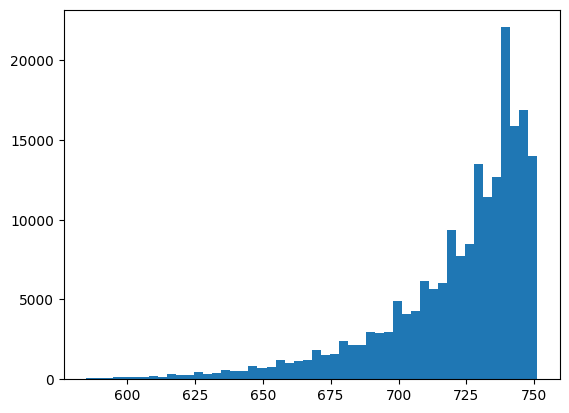

In [39]:
plt.hist(df['Credit Score'],50);

In [40]:
df[df['Credit Score'].isnull()]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
7,0000afa6-8902-4f8f-b870-25a8fdad0aeb,e49c1a82-a0f7-45e8-9f46-2f75c43f9fbc,Charged Off,24613,Long Term,NaN,6 years,Rent,NaN,Business Loan,$542.29,17.6,73.0,7,0,14123,16954,0.0,0.0
8,00011dfc-31c1-4178-932a-fbeb3f341efb,ef6e098c-6c83-4752-8d00-ff793e476b8c,Fully Paid,10036,Short Term,NaN,5 years,Rent,NaN,Debt Consolidation,$386.36,17.7,NaN,7,0,11970,16579,0.0,0.0
12,00029f9f-0cc5-4d4e-aabc-ea4a7fe74e12,afbc2fa3-3bad-4d48-b691-829aed78bad5,Charged Off,17980,Short Term,NaN,< 1 year,Own Home,NaN,Debt Consolidation,$597.50,9.9,43.0,7,0,6817,22800,0.0,0.0
20,00038a08-f058-4add-a8ed-497b91672a9e,727bb429-dfa1-41c4-a347-23230e23949f,Charged Off,16929,Long Term,NaN,3 years,Home Mortgage,NaN,Debt Consolidation,$745.70,14.9,NaN,10,0,28513,101110,0.0,0.0
22,0003b749-307f-4830-9fb4-9db7ed1b1c48,998dc43c-f9ce-466e-bdaa-7057b0bbb9cd,Fully Paid,7228,Short Term,NaN,3 years,Home Mortgage,NaN,Debt Consolidation,$439.56,17.8,NaN,13,1,8488,15866,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256959,fff9b38f-9a27-49d0-8d49-6306f41529eb,f8579c88-cbda-48ce-a542-42fbefccd01d,Fully Paid,9753,Short Term,NaN,2 years,Own Home,NaN,Debt Consolidation,$469.35,23.2,80.0,7,1,5022,9248,1.0,0.0
256962,fffaa912-faa8-4bdf-8ff1-fd5884e51c66,d059bcea-3016-48d3-b7e0-c6e618e1f2c3,Fully Paid,6655,Short Term,NaN,10+ years,Rent,NaN,Debt Consolidation,$620.42,11.1,62.0,15,0,7114,18336,0.0,0.0
256965,fffc297d-74f0-4d42-ad90-cdea2bd9aac0,b8cae6f0-6c9b-4982-bef2-e3cdf48add59,Charged Off,11524,Short Term,NaN,6 years,Home Mortgage,NaN,Debt Consolidation,$790.35,21.4,NaN,23,0,12818,19160,0.0,0.0
256973,fffe36ec-97a6-460a-a236-640b7e0669f0,6520de3e-5961-47b1-bced-6a8132acb5cc,Charged Off,10575,Long Term,NaN,< 1 year,Rent,NaN,Debt Consolidation,$707.08,14.8,NaN,18,0,20183,23496,0.0,0.0


In [41]:
df['Credit Score'].describe()

count    195308.000000
mean        721.203197
std          27.719518
min         585.000000
25%         710.000000
50%         730.000000
75%         741.000000
max         751.000000
Name: Credit Score, dtype: float64

In [42]:
df['Credit Score'].mean()

721.203197001659

In [43]:
df['Credit Score'] = df['Credit Score'].transform(lambda x: x.fillna(x.mean()))

In [44]:
# correlation table of Credit Score with other columns
df.corr(numeric_only= True)['Credit Score']
#Number of Credit Problems, Years of Credit History have the highest correlation
#getting groups with one or two observations because Credit History is continuous 
#possible solution: group years of credit history by ranges (1-15 years)
#1 year, 2 year, 3 year...15 years instead of 3.4 year, 3.5 year so there are more observations in each group
#this is called BINNING

#another possible solution: look at categorical (and discrete numerical variables) and anova

#another solution: linear regression model with target and high correlated values 
#y = number of credit score + years credit history + current loan amount
# need to make sure there is no multicollinearity

Current Loan Amount             0.079935
Credit Score                    1.000000
Annual Income                   0.012355
Years of Credit History         0.074643
Months since last delinquent    0.040261
Number of Open Accounts        -0.037967
Number of Credit Problems      -0.050345
Current Credit Balance         -0.013993
Bankruptcies                   -0.037576
Tax Liens                      -0.023956
Name: Credit Score, dtype: float64

In [46]:
#grouping by with highest correlation
# df.groupby(['Years of Credit History Binning'])['Credit Score'].mean()
#there are nulls in here so going to have to fill in the nulls still --> can be fixed with binnning

KeyError: 'Years of Credit History Binning'

In [47]:
#dealing with NAN values with mean from each term according to number of credit problems
df['Credit Score'] = df.groupby(['Years of Credit History'])['Credit Score'].transform(lambda x: x.fillna(x.mean()))

In [48]:
df['Credit Score'].describe()

count    256984.000000
mean        721.203197
std          24.165310
min         585.000000
25%         718.000000
50%         721.203197
75%         738.000000
max         751.000000
Name: Credit Score, dtype: float64

In [49]:
#checking
df['Credit Score'].isnull().sum()

0

In [50]:
df[df['Credit Score'].isnull()]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens


In [51]:
df.groupby(['Number of Credit Problems'])['Credit Score'].mean().isnull().sum()

0

In [52]:
df['Credit Score'] = df.groupby(['Number of Credit Problems'])['Credit Score'].transform(lambda x: x.fillna(x.mean()))

In [53]:
df['Credit Score'].isnull().sum()

0

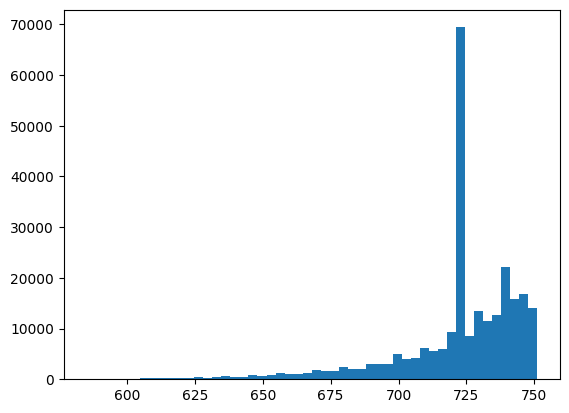

In [54]:
plt.hist(df['Credit Score'],50);

In [55]:
df['Credit Score'] = df['Credit Score'].astype(int)

In [56]:
df['Credit Score']

0         741
1         734
2         747
3         747
4         746
         ... 
256979    721
256980    737
256981    746
256982    746
256983    678
Name: Credit Score, Length: 256984, dtype: int32

## Years in Current Job

In [57]:
df['Years in current job'].value_counts(dropna=False)
#nulls can mean don't have a job

Years in current job
10+ years    78896
2 years      23462
< 1 year     21012
3 years      20659
5 years      17864
1 year       16746
4 years      16166
6 years      14597
7 years      13968
8 years      12206
NaN          11476
9 years       9932
Name: count, dtype: int64

In [58]:
df[df['Years in current job'].isnull()]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
9,0001cb86-af28-4011-bb86-183786e473ae,4aae67bb-d54b-41ae-8bce-1d62022ed8dd,Fully Paid,2036,Short Term,733,NaN,Home Mortgage,55985.0,Debt Consolidation,$741.79,19.8,29.0,7,0,10926,15676,0.0,0.0
38,0008255a-402e-4716-9e0a-8bdf55309781,4e25b6bf-9abc-4bbd-841e-c5a8403b68de,Fully Paid,6114,Short Term,721,NaN,Home Mortgage,NaN,Debt Consolidation,$206.97,17.8,21.0,8,1,5772,13975,1.0,0.0
57,000c16df-c24f-41cf-a90e-60301d131bb9,b07c4262-70bb-41cc-b28a-d87540577fb1,Fully Paid,7068,Short Term,721,NaN,Own Home,NaN,other,$425.68,21.3,NaN,7,1,4178,6850,1.0,0.0
94,001775be-defd-4c40-bda8-54edb5279848,75cd8e2e-2f86-459a-a719-e9f8384df817,Fully Paid,99999999,Short Term,675,NaN,Own Home,36549.0,Debt Consolidation,$444.68,14.2,NaN,7,0,18193,21329,0.0,0.0
95,0017ddc4-0232-441e-a01d-6b5bb67d0cc8,7668401c-2bf7-4edd-8233-c910d87fc0ca,Fully Paid,1971,Short Term,746,NaN,Home Mortgage,39420.0,Home Improvements,$768.69,22.0,43.0,7,0,8256,17163,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256903,ffebec60-7520-43d6-a392-1f5c30b6d07a,9b2098ea-7ac4-4479-a524-ce208004c70f,Charged Off,16201,Long Term,699,NaN,Own Home,35221.0,Debt Consolidation,"$1,091.84",32.9,NaN,19,0,31101,88104,0.0,0.0
256912,ffee9663-e257-46c1-bac8-86efd20d5f48,35a158e8-cf71-48f4-a43c-f33e0b0a25c3,Fully Paid,5676,Short Term,713,NaN,Home Mortgage,24666.0,Debt Consolidation,$138.75,13.0,24.0,9,0,4499,15842,0.0,0.0
256935,fff246c3-a91c-44d3-80cf-6ed1d65cf20c,b75bf001-64d8-4584-a92a-7511a828f99f,Fully Paid,99999999,Short Term,746,NaN,Rent,70777.0,Debt Consolidation,"$1,079.35",16.3,19.0,19,1,4143,27081,1.0,0.0
256940,fff355eb-8cc0-42c9-84bf-280c6664f785,14eabb7c-22f4-4060-9dce-b90ded55fef2,Fully Paid,8112,Short Term,716,NaN,Rent,30324.0,Debt Consolidation,$255.23,6.0,NaN,5,0,1798,6760,0.0,0.0


In [59]:
#filling in nulls with no job info
df['Years in current job'].fillna('No job info', inplace = True)

C:\Users\Tifanie\AppData\Local\Temp\ipykernel_7252\2563658904.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Years in current job'].fillna('No job info', inplace = True)


In [60]:
df['Years in current job'].value_counts(dropna=False)

Years in current job
10+ years      78896
2 years        23462
< 1 year       21012
3 years        20659
5 years        17864
1 year         16746
4 years        16166
6 years        14597
7 years        13968
8 years        12206
No job info    11476
9 years         9932
Name: count, dtype: int64

## Annual Income

In [61]:
df['Annual Income'].describe()

count    1.953080e+05
mean     7.195272e+04
std      5.887757e+04
min      0.000000e+00
25%      4.432100e+04
50%      6.124200e+04
75%      8.646200e+04
max      8.713547e+06
Name: Annual Income, dtype: float64

In [62]:
df[df['Annual Income'] == 8.713547e+06]
#one person with annual income of 8 million --> keeping

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
110725,6dfd2f9c-b796-4cb3-8f71-04d6ae8a8f92,ceee183a-9b02-4b82-ae53-14ccd5f785fd,Charged Off,8006,Short Term,725,10+ years,Home Mortgage,8713547.0,Debt Consolidation,$798.74,16.0,NaN,11,0,16462,30429,0.0,0.0
110726,6dfd2f9c-b796-4cb3-8f71-04d6ae8a8f92,ceee183a-9b02-4b82-ae53-14ccd5f785fd,Charged Off,8006,Short Term,725,10+ years,Home Mortgage,8713547.0,Debt Consolidation,$798.74,16.0,NaN,11,0,16462,30429,0.0,0.0


In [63]:
df['Annual Income'].sort_values(ascending = False)

110726    8713547.0
110725    8713547.0
169514    7523240.0
34065     5879400.0
39791     2267570.0
            ...    
256959          NaN
256962          NaN
256965          NaN
256973          NaN
256979          NaN
Name: Annual Income, Length: 256984, dtype: float64

In [64]:
df['Annual Income'].isnull().sum()

61676

In [65]:
df.corr(numeric_only=True)['Annual Income']
#Current Credit Balance has strongest correlation

Current Loan Amount             0.024069
Credit Score                    0.012355
Annual Income                   1.000000
Years of Credit History         0.146859
Months since last delinquent   -0.059675
Number of Open Accounts         0.140463
Number of Credit Problems      -0.013672
Current Credit Balance          0.292165
Bankruptcies                   -0.044837
Tax Liens                       0.038185
Name: Annual Income, dtype: float64

In [66]:
df.groupby(['Current Credit Balance'])['Annual Income'].mean()

Current Credit Balance
0          6.839255e+04
1          7.328537e+04
2          8.447444e+04
3          9.208006e+04
4          6.378733e+04
               ...     
690447     1.988000e+06
818209     1.507200e+05
854602     2.561260e+05
1730472    3.962800e+05
1731412             NaN
Name: Annual Income, Length: 45704, dtype: float64

In [67]:
df.groupby('Current Credit Balance')['Annual Income'].mean().isnull().sum()

3167

In [68]:
df['Annual Income'] = df.groupby(['Current Credit Balance'])['Annual Income'].transform(lambda x: x.fillna(x.mean()))

In [69]:
df['Annual Income'].isnull().sum()

3652

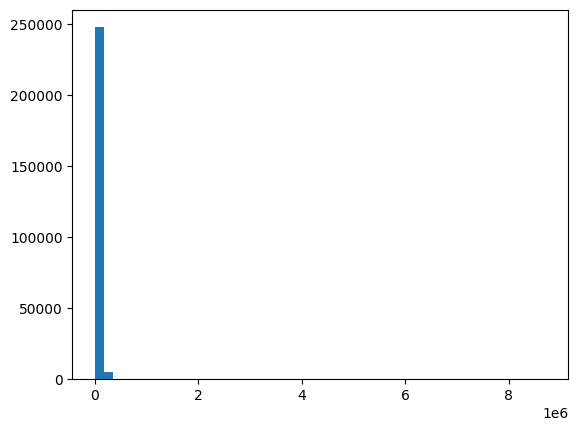

In [70]:
plt.hist(df['Annual Income'],50);

In [71]:
df.groupby('Years in current job')['Annual Income'].mean()

Years in current job
1 year         67621.147850
10+ years      77456.050856
2 years        69568.102972
3 years        69887.444678
4 years        69954.141602
5 years        69944.159596
6 years        70020.610627
7 years        71459.213092
8 years        72099.844039
9 years        72830.170823
< 1 year       67068.863738
No job info    51223.609742
Name: Annual Income, dtype: float64

In [72]:
df['Annual Income'] = df.groupby('Years in current job')['Annual Income'].transform(lambda x: x.fillna(x.mean()))

In [73]:
df['Annual Income'].isnull().sum()

0

In [74]:
df['Annual Income'].describe()

count    2.569840e+05
mean     7.129026e+04
std      5.372824e+04
min      0.000000e+00
25%      4.763000e+04
50%      6.279000e+04
75%      8.301200e+04
max      8.713547e+06
Name: Annual Income, dtype: float64

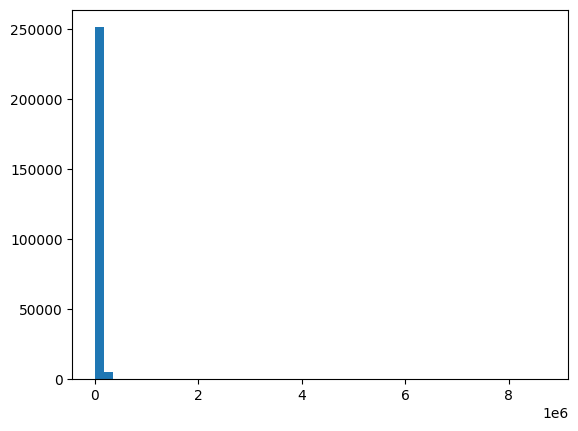

In [75]:
plt.hist(df['Annual Income'],50);

In [76]:
df['Annual Income'] = df['Annual Income'].astype(int)

## Home Ownership

In [77]:
df['Home Ownership'].unique()

array(['Home Mortgage', 'Own Home', 'Rent', 'HaveMortgage'], dtype=object)

In [78]:
df['Home Ownership'].value_counts()

Home Ownership
Home Mortgage    124477
Rent             109010
Own Home          22923
HaveMortgage        574
Name: count, dtype: int64

In [79]:
df['Home Ownership'] = df['Home Ownership'].replace('HaveMortgage','Home Mortgage')

In [80]:
df['Home Ownership'] = df['Home Ownership'].replace('Own Home','Own')

In [81]:
df['Home Ownership'].value_counts(dropna=False)

Home Ownership
Home Mortgage    125051
Rent             109010
Own               22923
Name: count, dtype: int64

## Purpose

In [82]:
df['Purpose'].value_counts(dropna=False)

Purpose
Debt Consolidation      203911
Home Improvements        14915
other                    14268
Other                     9667
Business Loan             4712
Buy a Car                 3276
Medical Bills             2868
Take a Trip               1570
Buy House                 1530
Educational Expenses       267
Name: count, dtype: int64

In [83]:
df['Purpose'] = df['Purpose'].replace('other','Other')

In [84]:
df['Purpose'].value_counts(dropna=False)

Purpose
Debt Consolidation      203911
Other                    23935
Home Improvements        14915
Business Loan             4712
Buy a Car                 3276
Medical Bills             2868
Take a Trip               1570
Buy House                 1530
Educational Expenses       267
Name: count, dtype: int64

## Monthly Debt

In [85]:
df['Monthly Debt']

0            $584.03
1         $1,106.04 
2         $1,321.85 
3            $751.92
4            $355.18
             ...    
256979    $1,706.58 
256980    $1,376.47 
256981       $297.96
256982       $297.96
256983    $2,525.82 
Name: Monthly Debt, Length: 256984, dtype: object

In [86]:
df['Monthly Debt'].str.replace('$','').str.replace(',','').astype(float).round(2)

0          584.03
1         1106.04
2         1321.85
3          751.92
4          355.18
           ...   
256979    1706.58
256980    1376.47
256981     297.96
256982     297.96
256983    2525.82
Name: Monthly Debt, Length: 256984, dtype: float64

In [87]:
df['Monthly Debt'] = df['Monthly Debt'].str.replace('$','').str.replace(',','').astype(float).round(2)

In [88]:
df['Monthly Debt'].dtype

dtype('float64')

In [89]:
df['Monthly Debt'].isnull().sum()

0

## Maximum Open Credit

In [90]:
df['Maximum Open Credit'].describe()

count     256984
unique     68987
top            0
freq        1831
Name: Maximum Open Credit, dtype: object

In [91]:
df[df['Maximum Open Credit'] == '#VALUE!']

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
184662,b798f46b-e27b-4823-af83-294b1ffc3490,f61890c5-e264-4b0f-a047-9cfa03b9d182,Charged Off,1470,Short Term,721,2 years,Rent,68392,Debt Consolidation,506.34,15.3,26.0,3,0,0,#VALUE!,0.0,0.0
184663,b798f46b-e27b-4823-af83-294b1ffc3490,f61890c5-e264-4b0f-a047-9cfa03b9d182,Charged Off,1470,Short Term,725,2 years,Rent,39200,Debt Consolidation,506.34,15.3,26.0,3,0,0,#VALUE!,0.0,0.0
187512,ba8f310d-7688-40e9-aa1c-30237dcaf051,80acb6ec-105f-42e4-bdd0-6c4792b88e71,Charged Off,23897,Long Term,697,7 years,Home Mortgage,49785,Home Improvements,1306.86,13.0,NaN,6,0,0,#VALUE!,0.0,0.0
187513,ba8f310d-7688-40e9-aa1c-30237dcaf051,80acb6ec-105f-42e4-bdd0-6c4792b88e71,Charged Off,23897,Long Term,697,7 years,Home Mortgage,49785,Home Improvements,1306.86,13.0,NaN,6,0,0,#VALUE!,0.0,0.0


In [92]:
#convert Maximum Open Credit to numeric, non-numeric values to NaN
df['Maximum Open Credit'] = pd.to_numeric(df['Maximum Open Credit'], errors= 'coerce')

In [93]:
df['Maximum Open Credit'].isnull().sum()

4

In [94]:
df.corr(numeric_only= True)['Maximum Open Credit']

Current Loan Amount             0.006478
Credit Score                    0.010436
Annual Income                   0.030824
Monthly Debt                    0.026433
Years of Credit History         0.021798
Months since last delinquent   -0.000541
Number of Open Accounts         0.019305
Number of Credit Problems      -0.008329
Current Credit Balance          0.111659
Maximum Open Credit             1.000000
Bankruptcies                   -0.009962
Tax Liens                      -0.000491
Name: Maximum Open Credit, dtype: float64

In [95]:
df.groupby('Current Credit Balance')['Maximum Open Credit'].mean()

Current Credit Balance
0          0.000000e+00
1          1.875833e+02
2          1.006667e+03
3          1.022850e+03
4          2.204737e+03
               ...     
690447     0.000000e+00
818209     2.235542e+06
854602     1.705792e+06
1730472    4.483087e+06
1731412    5.869192e+06
Name: Maximum Open Credit, Length: 45704, dtype: float64

In [96]:
df['Maximum Open Credit'] = df.groupby('Current Credit Balance')['Maximum Open Credit'].transform(lambda x: x.fillna(x.mean()))

In [97]:
df['Maximum Open Credit'].isnull().sum()

0

In [98]:
df['Maximum Open Credit'] = df['Maximum Open Credit'].astype(int)

## Months since last delinquent

In [99]:
df['Months since last delinquent'].unique()
#nulls can mean 0 

array([ 41.,  nan,  73.,  29.,  43.,  79.,   2.,  15.,  27.,   5.,  55.,
        21.,  56.,  25.,  67.,  37.,  74.,  45.,  76.,  46.,  35.,  60.,
        28.,  34.,  13.,   7.,  17.,  22.,  42.,  53.,  12.,  39.,  71.,
        20.,  38.,   0.,  81.,  78.,  44.,  63.,  77.,  49.,  30.,  70.,
        26.,  14.,   8.,  52.,  68.,  75.,  51.,  59.,  40.,   4.,  18.,
        47.,  24.,  31.,  69.,  32.,  36.,  16.,  10.,  62.,   9.,  11.,
        66.,  58.,  54.,   3.,  50.,  82.,  61.,  72.,  57.,  23.,  19.,
        80.,   6.,   1.,  86.,  48.,  33.,  65.,  64.,  84.,  83., 104.,
        90., 149.,  96., 110.,  99.,  91.,  95., 152.,  87., 131., 100.,
       116., 106., 107.,  85.,  89., 101., 122.,  93., 135., 139.,  88.,
       148.,  92.,  94., 114., 143., 115., 108., 140., 130.,  98.,  97.,
       120., 102., 176., 151., 118., 109., 134., 112., 113., 133., 119.])

In [100]:
#checking to see if nulls actually mean 0
df[(df['Months since last delinquent'].isnull()) & (df['Bankruptcies'] > 0)]
#since there are people who null delinquint but have bankruptcy then that means null != 0
#can fill in values where months since last delinquent null and bankruptcy = 0

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
5,0000a149-b055-4a57-b762-280783ccc25e,62ddc017-7023-4ba7-af23-1a7cd16c1ce5,Fully Paid,10208,Short Term,716,10+ years,Rent,41853,Business Loan,561.52,13.2,NaN,4,1,2289,4671,1.0,0.0
16,0002c691-5314-44ab-b205-3fb1cc4ee6b2,41207d1e-5d13-43ec-9fe9-f222b4da5e0c,Fully Paid,99999999,Short Term,744,6 years,Home Mortgage,65605,Debt Consolidation,984.07,21.0,NaN,5,1,11514,17262,1.0,0.0
22,0003b749-307f-4830-9fb4-9db7ed1b1c48,998dc43c-f9ce-466e-bdaa-7057b0bbb9cd,Fully Paid,7228,Short Term,721,3 years,Home Mortgage,64679,Debt Consolidation,439.56,17.8,NaN,13,1,8488,15866,1.0,0.0
57,000c16df-c24f-41cf-a90e-60301d131bb9,b07c4262-70bb-41cc-b28a-d87540577fb1,Fully Paid,7068,Short Term,721,No job info,Own,41614,Other,425.68,21.3,NaN,7,1,4178,6850,1.0,0.0
59,000c8f86-1e0a-4085-98aa-4f0d247c0884,1b9b21b9-dc97-403f-80bb-e3e667b99851,Fully Paid,99999999,Short Term,727,2 years,Rent,52825,Debt Consolidation,1360.25,14.3,NaN,11,1,34163,43080,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256926,fff118b9-a83d-4b0b-94ca-a4df96e0fa8f,4ef9be81-6156-46fd-aafd-0d8c0b8af01b,Fully Paid,10393,Short Term,721,10+ years,Rent,46998,Debt Consolidation,647.97,31.3,NaN,8,1,8997,44320,1.0,0.0
256943,fff4be77-72c2-406e-87cf-ce4b88e958a1,17c0d376-2153-4b04-98d9-a6950f768686,Fully Paid,10157,Short Term,744,10+ years,Home Mortgage,121884,Debt Consolidation,598.25,14.3,NaN,6,1,8738,11682,1.0,0.0
256961,fffa2dc8-6407-449a-99dc-12f59928d013,1abe52ef-2414-427a-bf9b-068c60e5352a,Fully Paid,8721,Short Term,726,7 years,Home Mortgage,38649,Debt Consolidation,811.63,15.1,NaN,9,1,3860,13592,1.0,0.0
256977,fffe84cf-67a1-468d-ab7b-cf06a9c4ee14,460c6cf5-4d12-4e3c-a3d0-46dd67c78cce,Charged Off,11953,Short Term,717,10+ years,Home Mortgage,39844,Debt Consolidation,982.82,11.7,NaN,9,1,4176,4783,1.0,0.0


In [101]:
df['Months since last delinquent'].isnull().sum()

140383

In [102]:
#fill in null values in months since last delinquent where bankruptcy = 0
# fill in bankruptcy with a high number because its months SINCE last delinquent not how many months are delinquent
df.loc[(df['Months since last delinquent'].isnull())&(df['Bankruptcies']==0), 'Months since last delinquent'] = 0

In [103]:
df['Months since last delinquent'].isnull().sum()

15079

In [104]:
df[(df['Months since last delinquent'].isnull())&(df['Bankruptcies']==0)]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens


In [105]:
df[(df['Months since last delinquent'].isnull()) & (df['Bankruptcies'] > 0)]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
5,0000a149-b055-4a57-b762-280783ccc25e,62ddc017-7023-4ba7-af23-1a7cd16c1ce5,Fully Paid,10208,Short Term,716,10+ years,Rent,41853,Business Loan,561.52,13.2,NaN,4,1,2289,4671,1.0,0.0
16,0002c691-5314-44ab-b205-3fb1cc4ee6b2,41207d1e-5d13-43ec-9fe9-f222b4da5e0c,Fully Paid,99999999,Short Term,744,6 years,Home Mortgage,65605,Debt Consolidation,984.07,21.0,NaN,5,1,11514,17262,1.0,0.0
22,0003b749-307f-4830-9fb4-9db7ed1b1c48,998dc43c-f9ce-466e-bdaa-7057b0bbb9cd,Fully Paid,7228,Short Term,721,3 years,Home Mortgage,64679,Debt Consolidation,439.56,17.8,NaN,13,1,8488,15866,1.0,0.0
57,000c16df-c24f-41cf-a90e-60301d131bb9,b07c4262-70bb-41cc-b28a-d87540577fb1,Fully Paid,7068,Short Term,721,No job info,Own,41614,Other,425.68,21.3,NaN,7,1,4178,6850,1.0,0.0
59,000c8f86-1e0a-4085-98aa-4f0d247c0884,1b9b21b9-dc97-403f-80bb-e3e667b99851,Fully Paid,99999999,Short Term,727,2 years,Rent,52825,Debt Consolidation,1360.25,14.3,NaN,11,1,34163,43080,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256926,fff118b9-a83d-4b0b-94ca-a4df96e0fa8f,4ef9be81-6156-46fd-aafd-0d8c0b8af01b,Fully Paid,10393,Short Term,721,10+ years,Rent,46998,Debt Consolidation,647.97,31.3,NaN,8,1,8997,44320,1.0,0.0
256943,fff4be77-72c2-406e-87cf-ce4b88e958a1,17c0d376-2153-4b04-98d9-a6950f768686,Fully Paid,10157,Short Term,744,10+ years,Home Mortgage,121884,Debt Consolidation,598.25,14.3,NaN,6,1,8738,11682,1.0,0.0
256961,fffa2dc8-6407-449a-99dc-12f59928d013,1abe52ef-2414-427a-bf9b-068c60e5352a,Fully Paid,8721,Short Term,726,7 years,Home Mortgage,38649,Debt Consolidation,811.63,15.1,NaN,9,1,3860,13592,1.0,0.0
256977,fffe84cf-67a1-468d-ab7b-cf06a9c4ee14,460c6cf5-4d12-4e3c-a3d0-46dd67c78cce,Charged Off,11953,Short Term,717,10+ years,Home Mortgage,39844,Debt Consolidation,982.82,11.7,NaN,9,1,4176,4783,1.0,0.0


In [106]:
df.corr(numeric_only= True)['Months since last delinquent']

Current Loan Amount            -0.002292
Credit Score                   -0.050635
Annual Income                   0.003420
Monthly Debt                    0.001659
Years of Credit History         0.098096
Months since last delinquent    1.000000
Number of Open Accounts         0.031573
Number of Credit Problems       0.197860
Current Credit Balance         -0.081145
Maximum Open Credit            -0.005423
Bankruptcies                    0.240126
Tax Liens                       0.038553
Name: Months since last delinquent, dtype: float64

In [107]:
df['Bankruptcies'].isnull().sum()

529

In [108]:
df.groupby('Bankruptcies')['Months since last delinquent'].mean()

Bankruptcies
0.0    15.528862
1.0    41.678092
2.0    49.402672
3.0    49.480000
4.0    57.576923
5.0    48.083333
6.0    69.333333
7.0    63.000000
Name: Months since last delinquent, dtype: float64

In [109]:
df['Months since last delinquent'] = df.groupby('Bankruptcies')['Months since last delinquent'].transform(lambda x: x.fillna(x.mean()))

In [110]:
df['Months since last delinquent'].isnull().sum()

529

In [111]:
df.groupby('Number of Credit Problems')['Months since last delinquent'].mean()

Number of Credit Problems
0     15.253319
1     38.535554
2     37.338152
3     37.378576
4     34.624398
5     36.116663
6     35.334966
7     41.682309
8     31.306508
9     54.967809
10    31.513461
11     0.500000
Name: Months since last delinquent, dtype: float64

In [112]:
df['Months since last delinquent'] = df.groupby('Number of Credit Problems')['Months since last delinquent'].transform(lambda x: x.fillna(x.mean()))

In [113]:
df['Months since last delinquent'].isnull().sum()

0

In [114]:
df['Months since last delinquent']= df['Months since last delinquent'].astype(int)

In [115]:
df

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741,10+ years,Home Mortgage,33694,Debt Consolidation,584.03,12.3,41,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734,4 years,Home Mortgage,42269,Other,1106.04,26.3,0,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747,10+ years,Home Mortgage,90126,Debt Consolidation,1321.85,28.8,0,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747,10+ years,Own,38072,Debt Consolidation,751.92,26.2,0,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746,4 years,Rent,50025,Debt Consolidation,355.18,11.5,0,12,0,17391,37081,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256979,fffef5b7-be99-4666-ac70-2a397d2ee435,7211a8e3-cba4-4132-b939-222eed8a662c,Fully Paid,3911,Short Term,721,2 years,Rent,64864,Debt Consolidation,1706.58,19.9,0,16,0,43992,44080,0.0,0.0
256980,ffffca93-aa8c-4123-b8ff-7852f6df889a,616fef0c-8f09-4327-9b5c-48fcfaa52934,Fully Paid,5078,Short Term,737,10+ years,Own,77186,Debt Consolidation,1376.47,19.1,47,9,0,1717,9758,0.0,0.0
256981,ffffcb2e-e48e-4d2c-a0d6-ed6bce5bfdbe,971a6682-183b-4a52-8bce-1d3429ade295,Charged Off,12116,Short Term,746,9 years,Home Mortgage,52504,Debt Consolidation,297.96,15.1,82,8,0,3315,20090,0.0,0.0
256982,ffffcb2e-e48e-4d2c-a0d6-ed6bce5bfdbe,971a6682-183b-4a52-8bce-1d3429ade295,Charged Off,12116,Short Term,746,9 years,Home Mortgage,52504,Debt Consolidation,297.96,15.1,82,8,0,3315,20090,0.0,0.0


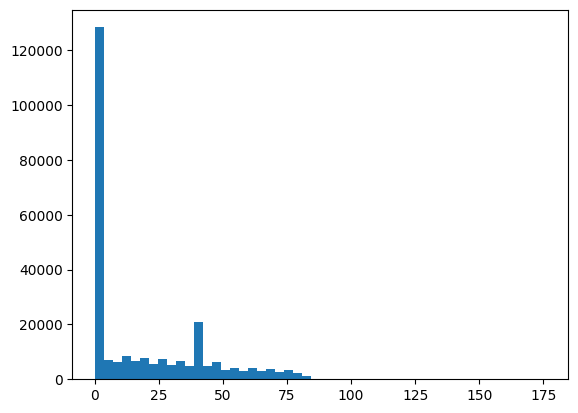

In [116]:
plt.hist(df['Months since last delinquent'],50);

## Current Loan Amount

In [117]:
df['Current Loan Amount'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 256984 entries, 0 to 256983
Series name: Current Loan Amount
Non-Null Count   Dtype
--------------   -----
256984 non-null  int64
dtypes: int64(1)
memory usage: 2.0 MB


In [118]:
df[df['Current Loan Amount'] == 99999999] 
#this means bad value, Databases put dummy value of 99999999

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
10,00020fb0-6b8a-4b3a-8c72-9c4c847e8cb6,c9decd06-16f7-44c3-b007-8776f2a9233d,Fully Paid,99999999,Short Term,742,3 years,Home Mortgage,64760,Debt Consolidation,582.84,26.8,0,11,0,8880,22711,0.0,0.0
16,0002c691-5314-44ab-b205-3fb1cc4ee6b2,41207d1e-5d13-43ec-9fe9-f222b4da5e0c,Fully Paid,99999999,Short Term,744,6 years,Home Mortgage,65605,Debt Consolidation,984.07,21.0,41,5,1,11514,17262,1.0,0.0
23,0003fbfd-33ee-4ae9-8074-b46f6ff59281,c14bbc84-5041-4e70-bd64-3db51f7e80ae,Fully Paid,99999999,Short Term,745,10+ years,Rent,39476,Other,483.58,15.4,79,12,0,4636,21171,0.0,0.0
28,0004f37b-5859-40f6-98d0-367aa3b3f3f1,f662b062-5fa5-463d-b5c0-4e36d09fcab1,Fully Paid,99999999,Short Term,724,1 year,Own,34297,Home Improvements,777.38,13.6,2,12,0,6720,53335,0.0,0.0
42,0008cacc-1ea9-4599-b114-12709b13c85d,cd853967-4535-4d36-bf93-269504c74911,Fully Paid,99999999,Short Term,750,10+ years,Own,86785,Other,56.41,22.0,0,7,0,3959,63862,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256938,fff2ae68-b9ca-4fb2-a53e-32684915bc6e,3a9268d1-a96b-4e7c-a022-8deea10d0b12,Fully Paid,99999999,Short Term,663,8 years,Home Mortgage,108482,Home Improvements,1365.07,20.3,0,13,0,17264,23174,0.0,0.0
256953,fff72330-5397-4cbd-ad39-4d54bbc0dca9,a901d714-eaa1-4b31-b385-c51c0fa6eabd,Fully Paid,99999999,Short Term,698,7 years,Rent,65941,Debt Consolidation,1364.97,21.5,0,16,0,19104,23556,0.0,0.0
256954,fff72f03-243b-422c-ab33-cb15e80e4c0d,f5cf8f78-6b65-4805-9b61-46086c441b08,Fully Paid,99999999,Short Term,742,10+ years,Rent,118128,Debt Consolidation,2608.66,17.0,0,17,0,35089,55520,0.0,0.0
256963,fffb62c8-6149-4746-8b10-e1d2363f3b31,30e19db5-7ffe-4375-a253-f86dc565dfe8,Fully Paid,99999999,Short Term,738,10+ years,Rent,34749,Debt Consolidation,833.98,11.0,25,17,0,3146,16050,0.0,0.0


In [119]:
df['Current Loan Amount'] = df['Current Loan Amount'].replace(99999999,np.nan)
#***could overwrite as NAN and impute 

In [120]:
df['Current Loan Amount'].isnull().sum()

35210

In [121]:
df.corr(numeric_only=True)['Current Loan Amount']

Current Loan Amount             1.000000
Credit Score                   -0.198968
Annual Income                   0.301577
Monthly Debt                    0.434637
Years of Credit History         0.151483
Months since last delinquent   -0.048753
Number of Open Accounts         0.200721
Number of Credit Problems      -0.074879
Current Credit Balance          0.320556
Maximum Open Credit             0.042283
Bankruptcies                   -0.097703
Tax Liens                       0.012584
Name: Current Loan Amount, dtype: float64

In [122]:
df.groupby('Monthly Debt')['Current Loan Amount'].mean()

Monthly Debt
0.00         8939.418919
0.39                 NaN
0.68         9358.000000
0.70         9928.000000
0.76        15011.000000
                ...     
10160.24             NaN
10831.65    34675.000000
11090.74    34762.000000
12645.65             NaN
22939.12    15928.000000
Name: Current Loan Amount, Length: 129115, dtype: float64

In [123]:
df['Current Loan Amount'] = df.groupby('Monthly Debt')['Current Loan Amount'].transform(lambda x: x.fillna(x.mean()))

In [124]:
df['Current Loan Amount'].isnull().sum()

14093

In [125]:
df.groupby('Current Credit Balance')['Current Loan Amount'].mean()

Current Credit Balance
0          10788.490852
1           9943.736842
2           5252.000000
3          12987.950000
4          14167.037037
               ...     
690447              NaN
818209     30144.000000
854602     27583.000000
1730472    34675.000000
1731412    34762.000000
Name: Current Loan Amount, Length: 45704, dtype: float64

In [126]:
df['Current Loan Amount'] = df.groupby('Current Credit Balance')['Current Loan Amount'].transform(lambda x: x.fillna(x.mean()))

In [127]:
df['Current Loan Amount'].isnull().sum()

1540

In [128]:
df.groupby('Annual Income')['Current Loan Amount'].mean()

Annual Income
0           3622.0
4033        1384.0
4134       20178.0
4699        1762.0
4704         980.0
            ...   
2267570        NaN
4383243    14679.0
5879400    12893.0
7523240     9899.0
8713547     8006.0
Name: Current Loan Amount, Length: 69588, dtype: float64

In [129]:
df['Current Loan Amount'] = df.groupby('Annual Income')['Current Loan Amount'].transform(lambda x: x.fillna(x.mean()))

In [130]:
df['Current Loan Amount'].isnull().sum()

534

In [131]:
df['Current Loan Amount'] = df['Current Loan Amount'].fillna(df['Current Loan Amount'].mean())

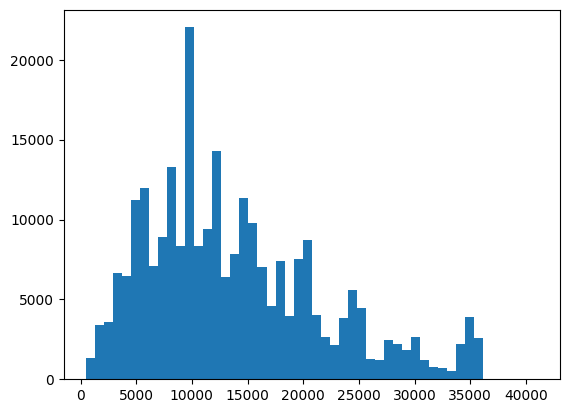

In [132]:
plt.hist(df['Current Loan Amount'],50);

In [133]:
df['Current Loan Amount'].describe()

count    256984.000000
mean      13910.018123
std        8022.446292
min         505.000000
25%        7947.000000
50%       12092.000000
75%       18718.000000
max       41000.000000
Name: Current Loan Amount, dtype: float64

In [134]:
df['Current Loan Amount'].isnull().sum()

0

In [135]:
df['Current Loan Amount'] = df['Current Loan Amount'].astype(int)

## Bankruptcies

In [136]:
df['Bankruptcies'].describe()

count    256455.000000
mean          0.110316
std           0.336229
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           7.000000
Name: Bankruptcies, dtype: float64

In [137]:
df['Bankruptcies'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 256984 entries, 0 to 256983
Series name: Bankruptcies
Non-Null Count   Dtype  
--------------   -----  
256455 non-null  float64
dtypes: float64(1)
memory usage: 2.0 MB


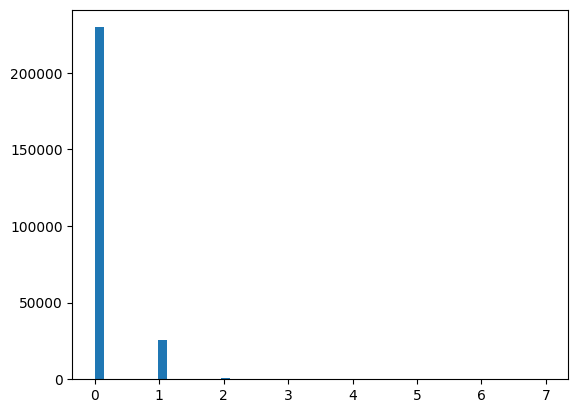

In [138]:
plt.hist(df['Bankruptcies'],50);

In [139]:
df['Bankruptcies'].isnull().sum()

529

In [140]:
df.corr(numeric_only=True)['Bankruptcies']

Current Loan Amount            -0.093157
Credit Score                   -0.037567
Annual Income                  -0.046581
Monthly Debt                   -0.078440
Years of Credit History         0.062049
Months since last delinquent    0.337853
Number of Open Accounts        -0.022805
Number of Credit Problems       0.755866
Current Credit Balance         -0.117995
Maximum Open Credit            -0.009961
Bankruptcies                    1.000000
Tax Liens                       0.046160
Name: Bankruptcies, dtype: float64

In [141]:
df.groupby('Number of Credit Problems')['Bankruptcies'].mean()

Number of Credit Problems
0     0.000000
1     0.822141
2     0.900234
3     1.039191
4     1.058182
5     1.008000
6     1.214286
7     1.187500
8     0.916667
9     0.100000
10    0.666667
11    0.000000
Name: Bankruptcies, dtype: float64

In [142]:
df['Bankruptcies'] = df.groupby('Number of Credit Problems')['Bankruptcies'].transform(lambda x: x.fillna(x.mean()))

In [143]:
df['Bankruptcies'].isnull().sum()

0

In [144]:
df['Bankruptcies'] = df['Bankruptcies'].astype(int)

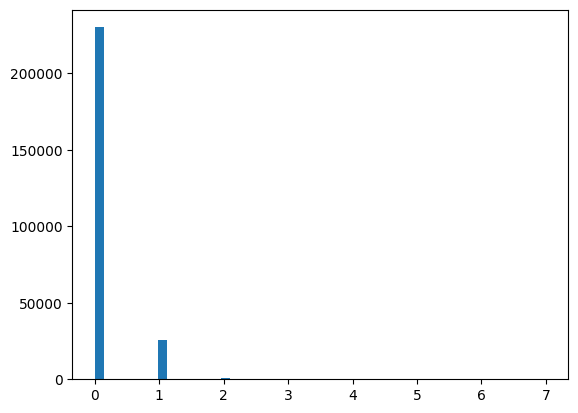

In [145]:
plt.hist(df['Bankruptcies'],50);

## Tax Liens

In [146]:
df['Tax Liens'].isnull().sum()

23

In [147]:
df['Tax Liens'].describe()

count    256961.000000
mean          0.027203
std           0.245950
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          11.000000
Name: Tax Liens, dtype: float64

In [148]:
df.corr(numeric_only=True)['Tax Liens']

Current Loan Amount             0.010789
Credit Score                   -0.023950
Annual Income                   0.031726
Monthly Debt                    0.020557
Years of Credit History         0.020915
Months since last delinquent    0.041984
Number of Open Accounts         0.005754
Number of Credit Problems       0.584917
Current Credit Balance         -0.011118
Maximum Open Credit            -0.000490
Bankruptcies                    0.046226
Tax Liens                       1.000000
Name: Tax Liens, dtype: float64

In [149]:
df.groupby('Number of Credit Problems')['Tax Liens'].mean()

Number of Credit Problems
0      0.000000
1      0.080112
2      0.661533
3      1.375474
4      2.240000
5      3.400000
6      4.380952
7      5.375000
8      6.833333
9      8.900000
10     9.166667
11    11.000000
Name: Tax Liens, dtype: float64

In [150]:
df['Tax Liens'] = df.groupby('Number of Credit Problems')['Tax Liens'].transform(lambda x: x.fillna(x.mean()))

In [151]:
df['Tax Liens'].isnull().sum()

0

In [152]:
df['Tax Liens'] = df['Tax Liens'].astype(int)

## Years of Credit History

In [153]:
df['Years of Credit History'].isnull().sum()

0

In [154]:
df['Years of Credit History'].describe()

count    256984.000000
mean         18.290195
std           7.075747
min           3.400000
25%          13.500000
50%          17.000000
75%          21.700000
max          70.500000
Name: Years of Credit History, dtype: float64

In [155]:
df[df['Years of Credit History'] > 70]
#transformation

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
126392,7db95e04-1081-43e1-8dab-77d0202145f8,6bb86735-f834-42b3-bd98-360da7094185,Fully Paid,6109,Short Term,743,6 years,Home Mortgage,33964,Home Improvements,0.0,70.5,78,5,2,0,0,0,0


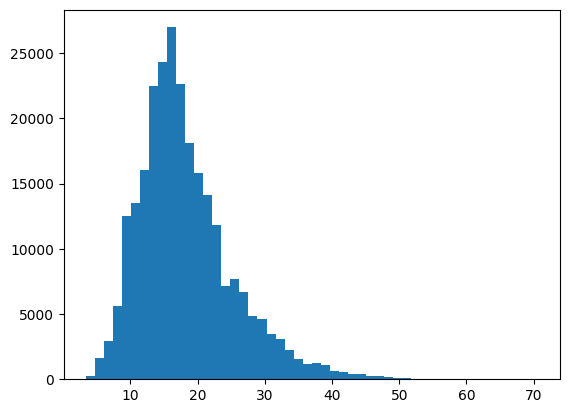

In [156]:
plt.hist(df['Years of Credit History'],50);

## Number of Open Accounts

In [157]:
df['Number of Open Accounts'].isnull().sum()

0

In [158]:
df['Number of Open Accounts'].describe()

count    256984.000000
mean         11.106267
std           4.982982
min           0.000000
25%           8.000000
50%          10.000000
75%          14.000000
max          76.000000
Name: Number of Open Accounts, dtype: float64

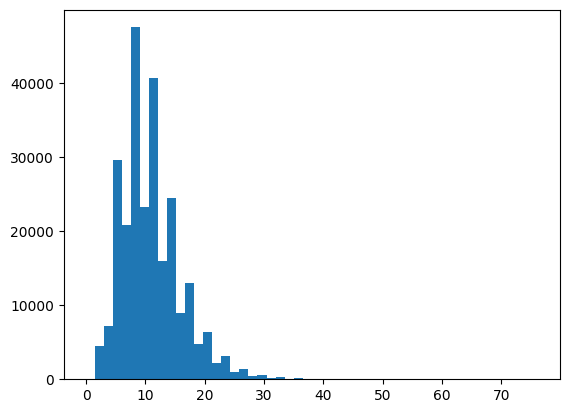

In [159]:
plt.hist(df['Number of Open Accounts'],50);

In [160]:
df[df['Number of Open Accounts'] > 60]
#outliers

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
8842,08dab131-9db3-4184-a32a-e12e48fd5d6c,907c2a89-76f8-4089-9a47-d410bb885339,Charged Off,18755,Long Term,721,7 years,Rent,68801,Debt Consolidation,1032.06,27.4,0,76,0,22111,28131,0,0
8843,08dab131-9db3-4184-a32a-e12e48fd5d6c,907c2a89-76f8-4089-9a47-d410bb885339,Charged Off,18755,Long Term,670,7 years,Rent,46912,Debt Consolidation,1032.06,27.4,0,76,0,22111,28131,0,0
245874,f4e0a453-a5ec-4011-9513-9d203ffe8e3c,3e62a9e2-a61b-472d-8e56-234e30061580,Charged Off,20426,Short Term,721,5 years,Home Mortgage,88949,Debt Consolidation,2195.80,15.7,0,76,0,40606,121575,0,0
245875,f4e0a453-a5ec-4011-9513-9d203ffe8e3c,3e62a9e2-a61b-472d-8e56-234e30061580,Charged Off,20426,Short Term,721,5 years,Home Mortgage,88949,Debt Consolidation,2195.80,15.7,0,76,0,40606,121575,0,0


In [161]:
df['Number of Open Accounts'] = df['Number of Open Accounts'].astype(int)

## Number of Credit Problems

In [162]:
df['Number of Credit Problems'].describe()

count    256984.000000
mean          0.156628
std           0.460731
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          11.000000
Name: Number of Credit Problems, dtype: float64

In [163]:
df[df['Number of Credit Problems']>=10]
#outliers

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
34698,228ad2c8-58ce-40ea-9045-a78d56b52599,324ac617-9e43-44c0-9a3b-04ab819005bc,Fully Paid,5593,Short Term,743,3 years,Rent,34955,Debt Consolidation,317.51,14.0,72,7,10,5456,14786,1,9
48127,2fd08273-b85a-4fd5-82d8-599219c15705,d6597681-08f8-46c7-a341-2fd0b3a6cccd,Fully Paid,4789,Short Term,732,8 years,Home Mortgage,57275,Debt Consolidation,1446.19,15.4,9,10,10,8418,21809,0,10
60359,3c0cd075-74d4-491d-841c-9974e4347339,3bac0231-b309-4e57-a28b-e11af138c341,Fully Paid,25088,Short Term,740,< 1 year,Home Mortgage,250876,Debt Consolidation,1271.10,18.9,49,13,10,14635,16207,2,8
168693,a7c1978d-5bac-41e5-a259-83cc8e450cca,2ca65a71-5385-4acb-9e79-eabe42d4d6eb,Fully Paid,14526,Long Term,671,4 years,Home Mortgage,59610,Other,1246.84,13.4,41,7,10,4286,8437,1,8
168963,a8063b53-1097-4d52-86e1-6a65dc8cd151,25fe3810-6b6e-46ac-a57d-ac0be538f103,Fully Paid,11773,Short Term,721,10+ years,Home Mortgage,105473,Debt Consolidation,1627.15,23.3,17,13,10,15037,19812,0,10
187144,ba2d59dc-a15e-49e9-b4d2-d9960af79501,da21ff8e-f4c3-4703-b81c-189dbd9abe0f,Fully Paid,22595,Short Term,712,No job info,Rent,125763,Debt Consolidation,2389.49,18.3,1,15,11,32943,60668,0,11
188241,bb39147e-5ae2-40c7-9ae4-e25a36f6f660,56de546f-b58e-4d96-b6a0-a775881e6e18,Fully Paid,14718,Short Term,721,10+ years,Rent,49843,Other,401.48,15.7,0,7,11,8537,22467,0,11
213675,d4987781-e1e9-4d6b-aedd-20a3a1a63742,eceff4f8-e213-4b69-9a43-e022b45c8438,Fully Paid,12478,Short Term,744,10+ years,Home Mortgage,48733,Debt Consolidation,257.88,12.5,0,6,10,2878,9165,0,10


In [164]:
df['Number of Credit Problems'].isnull().sum()

0

## Current Credit Balance

In [165]:
df['Current Credit Balance'].describe()

count    2.569840e+05
mean     1.540656e+04
std      1.966506e+04
min      0.000000e+00
25%      5.974000e+03
50%      1.107800e+04
75%      1.931900e+04
max      1.731412e+06
Name: Current Credit Balance, dtype: float64

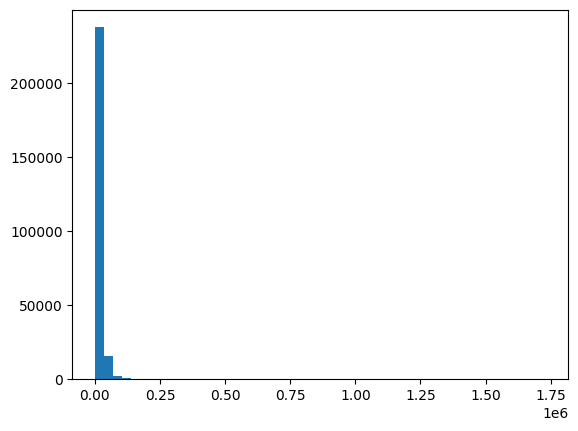

In [166]:
plt.hist(df['Current Credit Balance'],50);

In [167]:
df['Current Credit Balance'].max()

1731412

In [168]:
df[df['Current Credit Balance'] > 1700000]
#outliers

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
64449,401c650d-daa0-41dd-ab52-9a5926f70715,255619a3-96ca-4521-95ed-37f2bc4d2791,Fully Paid,34762,Short Term,721,10+ years,Home Mortgage,77456,Debt Consolidation,11090.74,32.0,0,28,0,1731412,5869192,0,0
194645,c194cb68-1c4d-4bba-8433-98cf4e0f357d,3e4ec65d-94de-4309-afaa-d5f5055c4053,Charged Off,34675,Short Term,732,10+ years,Home Mortgage,396280,Other,10831.65,32.5,0,28,0,1730472,4483087,0,0
194646,c194cb68-1c4d-4bba-8433-98cf4e0f357d,3e4ec65d-94de-4309-afaa-d5f5055c4053,Charged Off,34675,Short Term,721,10+ years,Home Mortgage,396280,Other,10831.65,32.5,0,28,0,1730472,4483087,0,0


In [169]:
df['Current Credit Balance'].isnull().sum()

0

## Loan Status

In [170]:
df['Loan Status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [171]:
df['Loan Status'].isnull().sum()

0

# Encoding Categoricals

## One Hot Encode Terms

In [172]:
import category_encoders as ce

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       256984 non-null  object 
 1   Customer ID                   256984 non-null  object 
 2   Loan Status                   256984 non-null  object 
 3   Current Loan Amount           256984 non-null  int32  
 4   Term                          256984 non-null  object 
 5   Credit Score                  256984 non-null  int32  
 6   Years in current job          256984 non-null  object 
 7   Home Ownership                256984 non-null  object 
 8   Annual Income                 256984 non-null  int32  
 9   Purpose                       256984 non-null  object 
 10  Monthly Debt                  256984 non-null  float64
 11  Years of Credit History       256984 non-null  float64
 12  Months since last delinquent  256984 non-nul

In [174]:
one = ce.OneHotEncoder(use_cat_names=True)
one.fit(df['Term'])
one.transform(df['Term'])
df = pd.concat([df,one.transform(df['Term'])], axis = 1)
df.drop('Term', axis=1, inplace=True)

In [175]:
one = ce.OneHotEncoder(use_cat_names=True)
one.fit(df['Years in current job'])
one.transform(df['Years in current job'])
df = pd.concat([df,one.transform(df['Years in current job'])], axis = 1)
df.drop('Years in current job', axis=1, inplace=True)

In [176]:
one.fit(df['Home Ownership'])
one.transform(df['Home Ownership'])
df = pd.concat([df,one.transform(df['Home Ownership'])], axis = 1)
df.drop('Home Ownership', axis=1, inplace=True)

In [177]:
one.fit(df['Purpose'])
one.transform(df['Purpose'])
df = pd.concat([df,one.transform(df['Purpose'])], axis = 1)
df.drop('Purpose', axis=1, inplace=True)

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 41 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Loan ID                           256984 non-null  object 
 1   Customer ID                       256984 non-null  object 
 2   Loan Status                       256984 non-null  object 
 3   Current Loan Amount               256984 non-null  int32  
 4   Credit Score                      256984 non-null  int32  
 5   Annual Income                     256984 non-null  int32  
 6   Monthly Debt                      256984 non-null  float64
 7   Years of Credit History           256984 non-null  float64
 8   Months since last delinquent      256984 non-null  int32  
 9   Number of Open Accounts           256984 non-null  int32  
 10  Number of Credit Problems         256984 non-null  int64  
 11  Current Credit Balance            256984 non-null  i

## Ordinal Encoding Loan Status

In [179]:
ord = ce.OrdinalEncoder(mapping = [{'col':'Loan Status', 'mapping' :{'Fully Paid':0,'Charged Off':1}}])
ord.fit(df['Loan Status'])
df['Loan Status Encoded'] = ord.fit_transform(df['Loan Status'])
df.drop('Loan Status', axis=1, inplace=True)

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 41 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Loan ID                           256984 non-null  object 
 1   Customer ID                       256984 non-null  object 
 2   Current Loan Amount               256984 non-null  int32  
 3   Credit Score                      256984 non-null  int32  
 4   Annual Income                     256984 non-null  int32  
 5   Monthly Debt                      256984 non-null  float64
 6   Years of Credit History           256984 non-null  float64
 7   Months since last delinquent      256984 non-null  int32  
 8   Number of Open Accounts           256984 non-null  int32  
 9   Number of Credit Problems         256984 non-null  int64  
 10  Current Credit Balance            256984 non-null  int64  
 11  Maximum Open Credit               256984 non-null  i

In [193]:
no_repay = df[df['Loan Status Encoded'] == 1]
numerical_features = df[['Current Loan Amount','Credit Score','Annual Income','Monthly Debt','Years of Credit History','Months since last delinquent','Number of Open Accounts','Number of Credit Problems', 'Current Credit Balance','Maximum Open Credit','Bankruptcies','Tax Liens','Loan Status Encoded']]
correlation_matrix = numerical_features.corr()
correlation_matrix
loan_status_correlation = correlation_matrix['Loan Status Encoded'].abs().sort_values(ascending=False)
print(loan_status_correlation)

Loan Status Encoded             1.000000
Credit Score                    0.233691
Current Loan Amount             0.070298
Annual Income                   0.057011
Years of Credit History         0.035548
Number of Open Accounts         0.020787
Monthly Debt                    0.016609
Tax Liens                       0.012590
Number of Credit Problems       0.010179
Current Credit Balance          0.008838
Maximum Open Credit             0.007923
Months since last delinquent    0.001600
Bankruptcies                    0.001107
Name: Loan Status Encoded, dtype: float64


# Transformation

In [162]:
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, RobustScaler, MinMaxScaler, Normalizer
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import boxcox

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 215700 entries, 0 to 256983
Data columns (total 41 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Loan ID                           215700 non-null  object 
 1   Customer ID                       215700 non-null  object 
 2   Current Loan Amount               215700 non-null  int32  
 3   Credit Score                      215700 non-null  int32  
 4   Annual Income                     215700 non-null  int32  
 5   Monthly Debt                      215700 non-null  float64
 6   Years of Credit History           215700 non-null  float64
 7   Months since last delinquent      215700 non-null  int32  
 8   Number of Open Accounts           215700 non-null  int32  
 9   Number of Credit Problems         215700 non-null  int64  
 10  Current Credit Balance            215700 non-null  int64  
 11  Maximum Open Credit               215700 non-null  int32 

In [164]:
df['Bankruptcies']

0         0
1         0
2         0
3         0
4         0
         ..
256977    1
256979    0
256980    0
256981    0
256983    0
Name: Bankruptcies, Length: 215700, dtype: int32

## Current Loan Amount

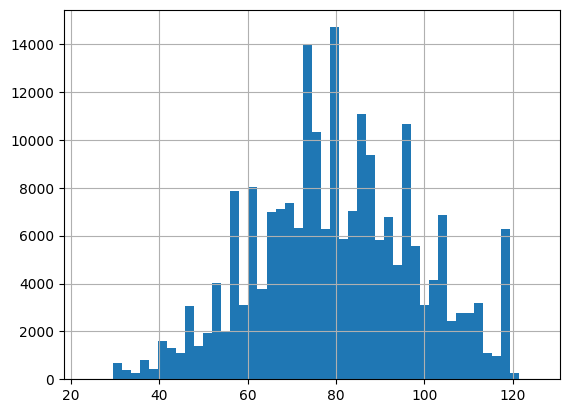

In [165]:
# Transform
bc_cla, l = boxcox(df['Current Loan Amount'])
pd.Series(bc_cla).hist(bins = 50);

## Credit Score

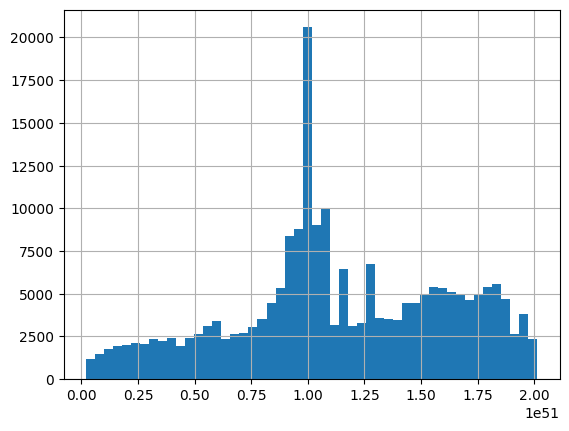

In [166]:
bc_cs, l = boxcox(df['Credit Score'])
pd.Series(bc_cs).hist(bins = 50);

## Annual Income

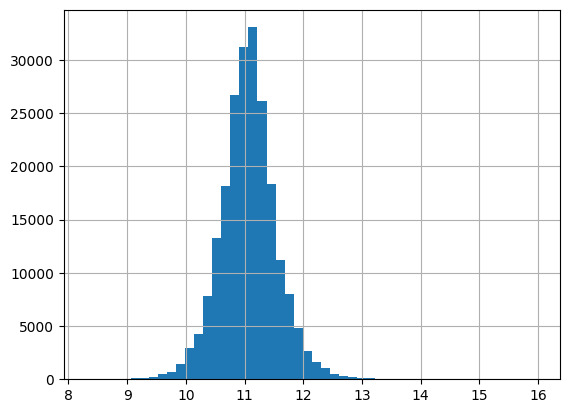

In [167]:
np.log1p(df['Annual Income']).hist(bins = 50);

In [168]:
np.log1p(df['Annual Income']).skew()

0.17743958970950213

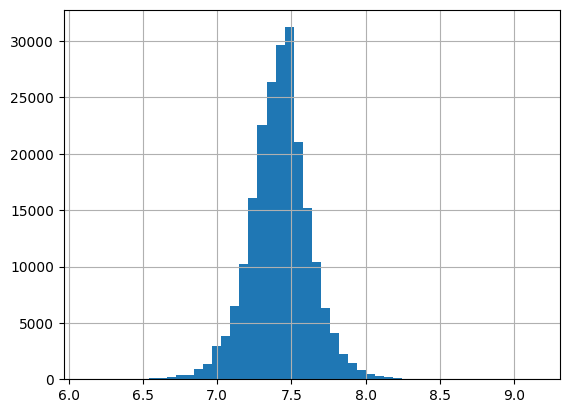

In [169]:
bc_annual_income, l = boxcox(df['Annual Income'])
pd.Series(bc_annual_income).hist(bins = 50);

In [170]:
pd.Series(bc_annual_income).skew()

-0.018167161430006473

## Monthly Debt

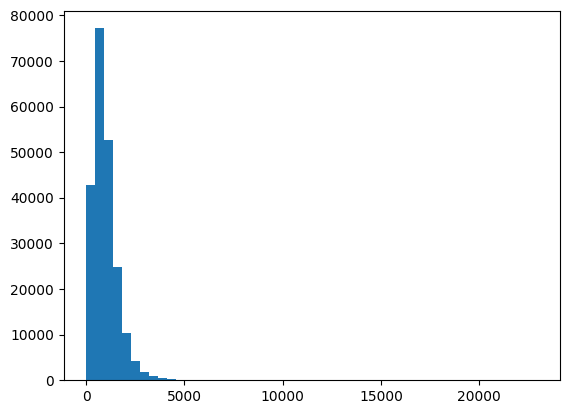

In [171]:
plt.hist(df['Monthly Debt'],50);

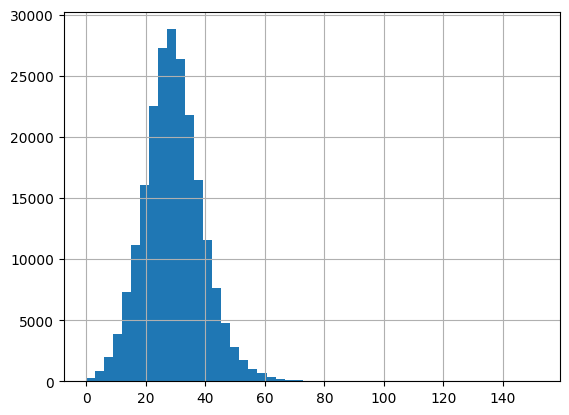

In [172]:
np.sqrt(df['Monthly Debt']).hist(bins = 50);

In [173]:
print(np.sqrt(df['Monthly Debt']).skew())

0.3862283217870943


In [174]:
sqrt_monthly_debt = np.sqrt(df['Monthly Debt'])

## Years of Credit History

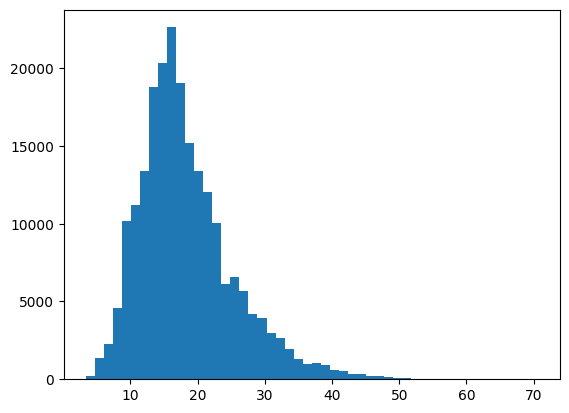

In [175]:
plt.hist(df['Years of Credit History'],50);

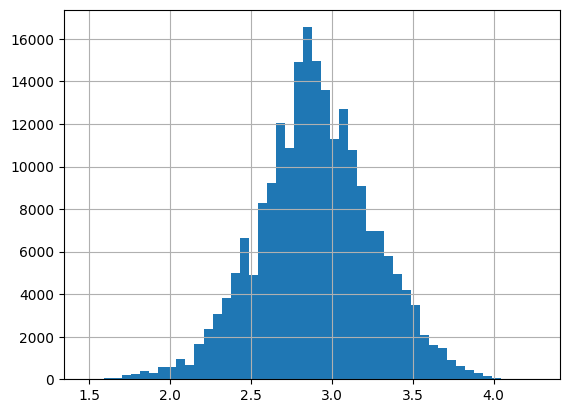

In [176]:
np.log1p(df['Years of Credit History']).hist(bins = 50);

In [177]:
log_ych = np.log1p(df['Years of Credit History'])

## Months Since Last Delinquent

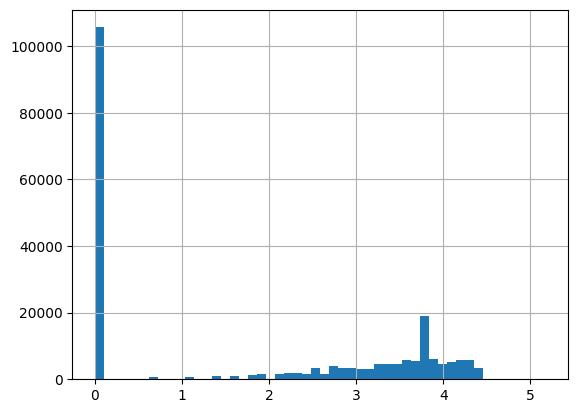

In [178]:
np.log1p(df['Months since last delinquent']).hist(bins = 50);

In [179]:
log_delinquent = np.log1p(df['Months since last delinquent'])

## Number of Open Accounts

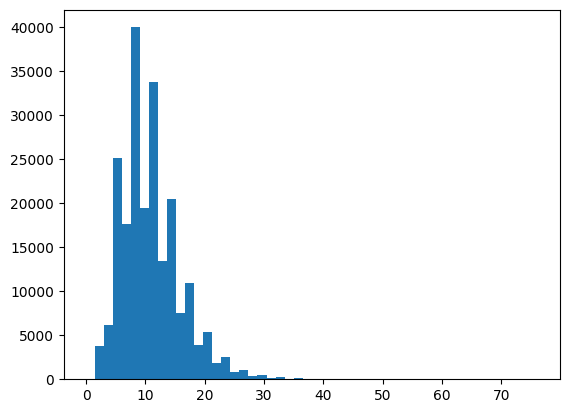

In [180]:
plt.hist(df['Number of Open Accounts'],50);

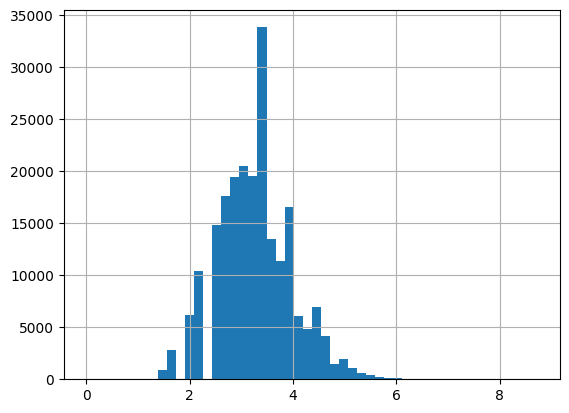

In [181]:
np.sqrt(df['Number of Open Accounts']).hist(bins = 50);

In [182]:
sqrt_open_account = np.sqrt(df['Number of Open Accounts'])

## Current Credit Balance

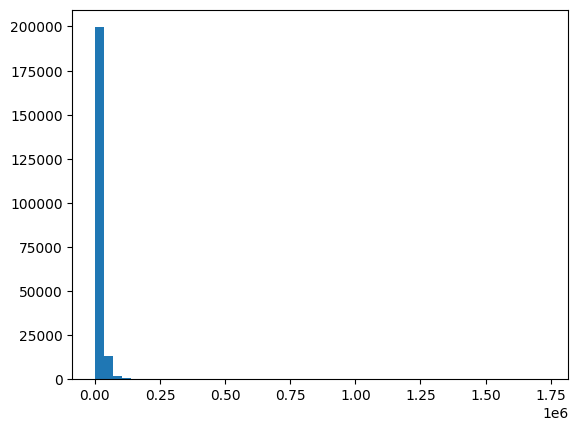

In [183]:
plt.hist(df['Current Credit Balance'],50);

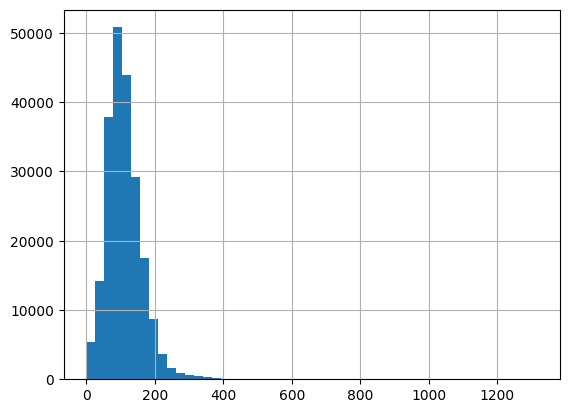

In [184]:
np.sqrt(df['Current Credit Balance']).hist(bins = 50);

In [185]:
sqrt_current_credit_balance = np.sqrt(df['Current Credit Balance'])

## Maximum Open Credit

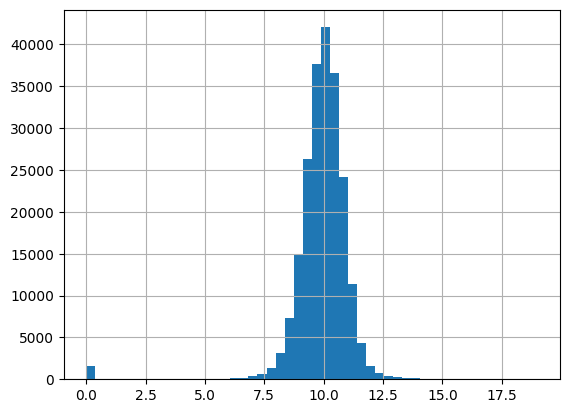

In [186]:
np.log1p(df['Maximum Open Credit']).hist(bins = 50);

In [187]:
log_maximum_open_credit = np.log1p(df['Maximum Open Credit'])

## Bankruptcies

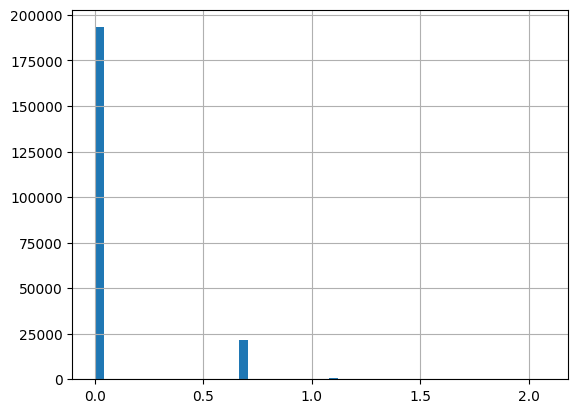

In [188]:
np.log1p(df['Bankruptcies']).hist(bins = 50);

## Tax Liens

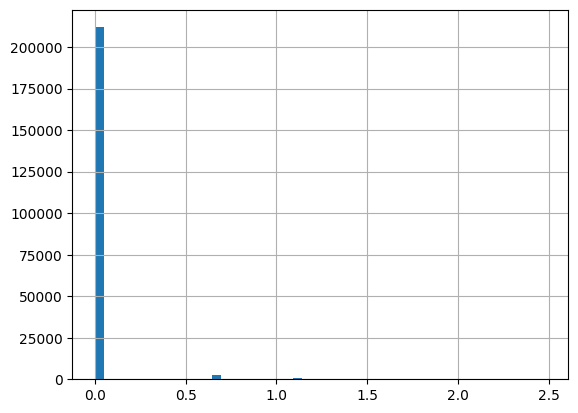

In [189]:
np.log1p(df['Tax Liens']).hist(bins = 50);

In [190]:
df['log_Bankruptcies'] = np.log1p(df['Bankruptcies'])
df['log_Tax Liens'] = np.log1p(df['Tax Liens'])

In [191]:
df

,Loan ID,Customer ID,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,...,Purpose_Business Loan,Purpose_Home Improvements,Purpose_Buy House,Purpose_Buy a Car,Purpose_Medical Bills,Purpose_Take a Trip,Purpose_Educational Expenses,Loan Status Encoded,log_Bankruptcies,log_Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,11520,741,33694,584.03,12.3,41,10,0,...,0,0,0,0,0,0,0,0,0.000000,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,3441,734,42269,1106.04,26.3,0,17,0,...,0,0,0,0,0,0,0,0,0.000000,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,21029,747,90126,1321.85,28.8,0,5,0,...,0,0,0,0,0,0,0,0,0.000000,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,18743,747,38072,751.92,26.2,0,9,0,...,0,0,0,0,0,0,0,0,0.000000,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,11731,746,50025,355.18,11.5,0,12,0,...,0,0,0,0,0,0,0,0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256977,fffe84cf-67a1-468d-ab7b-cf06a9c4ee14,460c6cf5-4d12-4e3c-a3d0-46dd67c78cce,11953,717,39844,982.82,11.7,41,9,1,...,0,0,0,0,0,0,0,1,0.693147,0.0
256979,fffef5b7-be99-4666-ac70-2a397d2ee435,7211a8e3-cba4-4132-b939-222eed8a662c,3911,723,64864,1706.58,19.9,0,16,0,...,0,0,0,0,0,0,0,0,0.000000,0.0
256980,ffffca93-aa8c-4123-b8ff-7852f6df889a,616fef0c-8f09-4327-9b5c-48fcfaa52934,5078,737,77186,1376.47,19.1,47,9,0,...,0,0,0,0,0,0,0,0,0.000000,0.0
256981,ffffcb2e-e48e-4d2c-a0d6-ed6bce5bfdbe,971a6682-183b-4a52-8bce-1d3429ade295,12116,746,52504,297.96,15.1,82,8,0,...,0,0,0,0,0,0,0,1,0.000000,0.0


# Scaling

In [192]:
#only scale continuous variables
scaled_df = pd.DataFrame({
    'bc Current Loan Amount': bc_cla,
    'bc_Credit Score': bc_cs, 
    'bc_Annual Income': bc_annual_income, 
    'sqrt_Monthly Debt': sqrt_monthly_debt, 
    'log_Years of Credit History': log_ych, 
    'log_Months Since Last Delinquent': log_delinquent, 
    'sqrt_Number of Open Accounts': sqrt_open_account, 
    'sqrt_Current Credit Balance': sqrt_current_credit_balance, 
    'log_Maximum Open Credit': log_maximum_open_credit})
scaled_df

,bc Current Loan Amount,bc_Credit Score,bc_Annual Income,sqrt_Monthly Debt,log_Years of Credit History,log_Months Since Last Delinquent,sqrt_Number of Open Accounts,sqrt_Current Credit Balance,log_Maximum Open Credit
0,78.342224,1.575547e+51,7.145626,24.166713,2.587764,3.737670,3.162278,82.219219,9.683900
1,49.659285,1.324585e+51,7.245629,33.257180,3.306887,0.000000,4.123106,79.132800,9.860058
2,98.033441,1.825804e+51,7.567104,36.357255,3.394508,0.000000,2.236068,144.799862,10.251888
3,93.929867,1.825804e+51,7.199724,27.421160,3.303217,0.000000,3.000000,150.096636,10.690034
4,78.875638,1.781638e+51,7.318802,18.846220,2.525729,0.000000,3.464102,131.874941,10.520887
...,...,...,...,...,...,...,...,...,...
256977,79.430285,8.630762e+50,7.219740,31.349960,2.541602,3.737670,3.000000,64.621978,8.473032
256979,52.140342,1.005092e+51,7.429771,41.310773,3.039749,0.000000,4.000000,209.742700,10.693784
256980,57.570460,1.427122e+51,7.502827,37.100809,3.000720,3.871201,3.000000,41.436699,9.185945
256981,79.833349,1.781638e+51,7.339634,17.261518,2.778819,4.418841,2.828427,57.576037,9.908027


In [193]:
rs = RobustScaler()
rs.fit_transform(scaled_df)
scaled_df = pd.DataFrame(rs.transform(scaled_df), columns = scaled_df.columns)

In [194]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215700 entries, 0 to 215699
Data columns (total 9 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   bc Current Loan Amount            215700 non-null  float64
 1   bc_Credit Score                   215700 non-null  float64
 2   bc_Annual Income                  215700 non-null  float64
 3   sqrt_Monthly Debt                 215700 non-null  float64
 4   log_Years of Credit History       215700 non-null  float64
 5   log_Months Since Last Delinquent  215700 non-null  float64
 6   sqrt_Number of Open Accounts      215700 non-null  float64
 7   sqrt_Current Credit Balance       215700 non-null  float64
 8   log_Maximum Open Credit           215700 non-null  float64
dtypes: float64(9)
memory usage: 14.8 MB


In [ ]:
scaled_df.columns

Index(['bc Current Loan Amount', 'bc_Credit Score', 'bc_Annual Income',
       'sqrt_Monthly Debt', 'log_Years of Credit History',
       'log_Months Since Last Delinquent', 'sqrt_Number of Open Accounts',
       'sqrt_Current Credit Balance', 'log_Maximum Open Credit'],
      dtype='object')

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 215700 entries, 0 to 256983
Data columns (total 43 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Loan ID                           215700 non-null  object 
 1   Customer ID                       215700 non-null  object 
 2   Current Loan Amount               215700 non-null  int32  
 3   Credit Score                      215700 non-null  int32  
 4   Annual Income                     215700 non-null  int32  
 5   Monthly Debt                      215700 non-null  float64
 6   Years of Credit History           215700 non-null  float64
 7   Months since last delinquent      215700 non-null  int32  
 8   Number of Open Accounts           215700 non-null  int32  
 9   Number of Credit Problems         215700 non-null  int64  
 10  Current Credit Balance            215700 non-null  int64  
 11  Maximum Open Credit               215700 non-null  int32 

In [ ]:
df.columns

Index(['Loan ID', 'Customer ID', 'Current Loan Amount', 'Credit Score',
       'Annual Income', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens', 'Term_Short Term',
       'Term_Long Term', 'Years in current job_10+ years',
       'Years in current job_4 years', 'Years in current job_6 years',
       'Years in current job_5 years', 'Years in current job_No job info',
       'Years in current job_3 years', 'Years in current job_2 years',
       'Years in current job_< 1 year', 'Years in current job_1 year',
       'Years in current job_7 years', 'Years in current job_9 years',
       'Years in current job_8 years', 'Home Ownership_Home Mortgage',
       'Home Ownership_Own', 'Home Ownership_Rent',
       'Purpose_Debt Consolidation', 'Purpose_Other', 'Purpose_Business Loan',
       'Purpose_Home Improvements',

In [198]:
df.reset_index(drop=True, inplace = True)
scaled_df.reset_index(drop=True, inplace = True)
df_combined = pd.concat([df,scaled_df], axis = 1)

In [199]:
df_combined

,Loan ID,Customer ID,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,...,log_Tax Liens,bc Current Loan Amount,bc_Credit Score,bc_Annual Income,sqrt_Monthly Debt,log_Years of Credit History,log_Months Since Last Delinquent,sqrt_Number of Open Accounts,sqrt_Current Credit Balance,log_Maximum Open Credit
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,11520,741,33694,584.03,12.3,41,10,0,...,0.0,-0.049798,0.769075,-1.210995,-0.389651,-0.678890,0.646411,0.000000,-0.368827,-0.304344
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,3441,734,42269,1106.04,26.3,0,17,0,...,0.0,-1.195482,0.396757,-0.777167,0.344385,0.934437,-0.381103,1.052120,-0.418621,-0.135574
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,21029,747,90126,1321.85,28.8,0,5,0,...,0.0,0.736729,1.140346,0.617422,0.594709,1.131013,-0.381103,-1.014213,0.640785,0.239824
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,18743,747,38072,751.92,26.2,0,9,0,...,0.0,0.572819,1.140346,-0.976309,-0.126861,0.926204,-0.381103,-0.177696,0.726238,0.659594
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,11731,746,50025,355.18,11.5,0,12,0,...,0.0,-0.028492,1.074823,-0.459735,-0.819269,-0.818064,-0.381103,0.330501,0.432267,0.497541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215695,fffe84cf-67a1-468d-ab7b-cf06a9c4ee14,460c6cf5-4d12-4e3c-a3d0-46dd67c78cce,11953,717,39844,982.82,11.7,41,9,1,...,0.0,-0.006338,-0.287919,-0.889479,0.190381,-0.782453,0.646411,-0.177696,-0.652723,-1.464429
215696,fffef5b7-be99-4666-ac70-2a397d2ee435,7211a8e3-cba4-4132-b939-222eed8a662c,3911,723,64864,1706.58,19.9,0,16,0,...,0.0,-1.096381,-0.077230,0.021660,0.994695,0.335123,-0.381103,0.917318,1.688507,0.663187
215697,ffffca93-aa8c-4123-b8ff-7852f6df889a,616fef0c-8f09-4327-9b5c-48fcfaa52934,5078,737,77186,1376.47,19.1,47,9,0,...,0.0,-0.879486,0.548877,0.338585,0.654750,0.247562,0.683120,-0.177696,-1.026771,-0.781415
215698,ffffcb2e-e48e-4d2c-a0d6-ed6bce5bfdbe,971a6682-183b-4a52-8bce-1d3429ade295,12116,746,52504,297.96,15.1,82,8,0,...,0.0,0.009762,1.074823,-0.369367,-0.947231,-0.250264,0.833670,-0.365571,-0.766395,-0.089616


In [200]:
drop_columns = ['Current Loan Amount', 'Credit Score',
       'Annual Income', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens']
df_combined = df_combined.drop(columns = drop_columns)

In [201]:
df_combined

,Loan ID,Customer ID,Term_Short Term,Term_Long Term,Years in current job_10+ years,Years in current job_4 years,Years in current job_6 years,Years in current job_5 years,Years in current job_No job info,Years in current job_3 years,...,log_Tax Liens,bc Current Loan Amount,bc_Credit Score,bc_Annual Income,sqrt_Monthly Debt,log_Years of Credit History,log_Months Since Last Delinquent,sqrt_Number of Open Accounts,sqrt_Current Credit Balance,log_Maximum Open Credit
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,1,0,1,0,0,0,0,0,...,0.0,-0.049798,0.769075,-1.210995,-0.389651,-0.678890,0.646411,0.000000,-0.368827,-0.304344
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,1,0,0,1,0,0,0,0,...,0.0,-1.195482,0.396757,-0.777167,0.344385,0.934437,-0.381103,1.052120,-0.418621,-0.135574
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,1,0,1,0,0,0,0,0,...,0.0,0.736729,1.140346,0.617422,0.594709,1.131013,-0.381103,-1.014213,0.640785,0.239824
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,1,0,1,0,0,0,0,0,...,0.0,0.572819,1.140346,-0.976309,-0.126861,0.926204,-0.381103,-0.177696,0.726238,0.659594
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,1,0,0,1,0,0,0,0,...,0.0,-0.028492,1.074823,-0.459735,-0.819269,-0.818064,-0.381103,0.330501,0.432267,0.497541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215695,fffe84cf-67a1-468d-ab7b-cf06a9c4ee14,460c6cf5-4d12-4e3c-a3d0-46dd67c78cce,1,0,1,0,0,0,0,0,...,0.0,-0.006338,-0.287919,-0.889479,0.190381,-0.782453,0.646411,-0.177696,-0.652723,-1.464429
215696,fffef5b7-be99-4666-ac70-2a397d2ee435,7211a8e3-cba4-4132-b939-222eed8a662c,1,0,0,0,0,0,0,0,...,0.0,-1.096381,-0.077230,0.021660,0.994695,0.335123,-0.381103,0.917318,1.688507,0.663187
215697,ffffca93-aa8c-4123-b8ff-7852f6df889a,616fef0c-8f09-4327-9b5c-48fcfaa52934,1,0,1,0,0,0,0,0,...,0.0,-0.879486,0.548877,0.338585,0.654750,0.247562,0.683120,-0.177696,-1.026771,-0.781415
215698,ffffcb2e-e48e-4d2c-a0d6-ed6bce5bfdbe,971a6682-183b-4a52-8bce-1d3429ade295,1,0,0,0,0,0,0,0,...,0.0,0.009762,1.074823,-0.369367,-0.947231,-0.250264,0.833670,-0.365571,-0.766395,-0.089616


In [202]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215700 entries, 0 to 215699
Data columns (total 40 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Loan ID                           215700 non-null  object 
 1   Customer ID                       215700 non-null  object 
 2   Term_Short Term                   215700 non-null  int64  
 3   Term_Long Term                    215700 non-null  int64  
 4   Years in current job_10+ years    215700 non-null  int64  
 5   Years in current job_4 years      215700 non-null  int64  
 6   Years in current job_6 years      215700 non-null  int64  
 7   Years in current job_5 years      215700 non-null  int64  
 8   Years in current job_No job info  215700 non-null  int64  
 9   Years in current job_3 years      215700 non-null  int64  
 10  Years in current job_2 years      215700 non-null  int64  
 11  Years in current job_< 1 year     215700 non-null  i

# Training Data

In [920]:
!pip install imbalanced-learn

   ---------------------------------------- 0.0/257.7 kB ? eta -:--:--
   - -------------------------------------- 10.2/257.7 kB ? eta -:--:--
   ------------------- -------------------- 122.9/257.7 kB 1.8 MB/s eta 0:00:01
   ---------------------------------------- 257.7/257.7 kB 2.6 MB/s eta 0:00:00


In [204]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification 
from imblearn.over_sampling import RandomOverSampler, SMOTE 
from imblearn.under_sampling import RandomUnderSampler

In [210]:
X = df_combined.drop(['Loan Status Encoded', 'Loan ID', 'Customer ID'], axis = 1)
y = df_combined[['Loan Status Encoded']] #double square brackets makes it a df
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=1,test_size=0.3, shuffle=True)

In [211]:
print(len(X_train))
print(len(y_train))
print(X_train.shape)
print(y_train.shape)

150990
150990
(150990, 37)
(150990, 1)


## Undersample

In [212]:
undersample = RandomUnderSampler(random_state = 1)
X_under, y_under = undersample.fit_resample(X_train,y_train)
print(X_under.shape)
print(y_under.shape)

(55312, 37)
(55312, 1)


## Oversample

In [213]:
oversample = RandomOverSampler(random_state=1)
X_over, y_over = oversample.fit_resample(X_train,y_train)
print(X_over.shape)
print(y_over.shape)

(246668, 37)
(246668, 1)


## SMOTE

In [214]:
smote = SMOTE(random_state=1)
X_smote, y_smote = smote.fit_resample(X_train, y_train)
print(X_smote.shape)
print(y_smote.shape)

(246668, 37)
(246668, 1)
